# **Procesamiento de Datos a Gran Escala**

## Computación con CUDA

*Autores: Pablo López Perez y Daniel Beteta Francisco*

# Entorno de Ejecución
Compilador y GPU

Utilizando el comando *lscpu* se obtienen diversas características de la CPU que utiliza el sistema.

In [ ]:
!lscpu

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              2
On-line CPU(s) list: 0,1
Thread(s) per core:  2
Core(s) per socket:  1
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               85
Model name:          Intel(R) Xeon(R) CPU @ 2.00GHz
Stepping:            3
CPU MHz:             2000.152
BogoMIPS:            4000.30
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            1024K
L3 cache:            39424K
NUMA node0 CPU(s):   0,1
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_si

Con el comando _free_ se puede conocer información de la memoria física y swap del sistema. Además se le añade el flag -h para que nos indique los datos en orden de Megabytes, GigaBytes...

In [ ]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:            12G        623M        9.5G        1.3M        2.6G         11G
Swap:            0B          0B          0B


Comprobamos la version del compilador cuda y que GPU tenemos disponible

In [ ]:
!nvcc --version
!nvidia-smi

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0
Wed Nov 16 10:52:49 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |      

Directorio de trabajo

In [ ]:
!pwd
!ls -la .
!ls /

/content/workcuda
total 10320
drwxr-xr-x 2 root root   4096 Nov 16 10:22 .
drwxr-xr-x 1 root root   4096 Nov 16 09:49 ..
-rwxr-xr-x 1 root root 691440 Nov 16 10:22 mult_mat_cpu
-rw-r--r-- 1 root root   1471 Nov 16 10:22 mult_mat_cpu.cu
-rwxr-xr-x 1 root root 700136 Nov 16 10:22 mult_mat_gpu1
-rw-r--r-- 1 root root   2085 Nov 16 10:22 mult_mat_gpu1.cu
-rwxr-xr-x 1 root root 700136 Nov 16 10:22 mult_mat_gpu2
-rw-r--r-- 1 root root   2591 Nov 16 10:22 mult_mat_gpu2.cu
-rwxr-xr-x 1 root root 696136 Nov 16 10:21 stencil1d1
-rw-r--r-- 1 root root   1986 Nov 16 10:21 stencil1d1.cu
-rwxr-xr-x 1 root root 696136 Nov 16 10:21 stencil1d2
-rw-r--r-- 1 root root   2786 Nov 16 10:21 stencil1d2.cu
-rwxr-xr-x 1 root root 696136 Nov 16 10:21 stencil1d3
-rw-r--r-- 1 root root   2808 Nov 16 10:21 stencil1d3.cu
-rwxr-xr-x 1 root root 692320 Nov 16 10:20 suma0
-rw-r--r-- 1 root root   1091 Nov 16 10:20 suma0.cu
-rwxr-xr-x 1 root root 700976 Nov 16 10:20 suma1
-rw-r--r-- 1 root root   1370 Nov 16 10:20 suma

Ahora ejecutaremos el código de ejemplo que esta en la librería Cuda. Dicho ejemplo enumera las propiedades del dispositivo Cuda que hay en el sistema.

Primero, cambiaremos el directorio a aquel donde se encuentra el código fuente:

In [ ]:
%cd /usr/local/cuda/samples/1_Utilities/deviceQuery/
%ls

/usr/local/cuda-11.2/samples/1_Utilities/deviceQuery
deviceQuery*     deviceQuery.o  NsightEclipse.xml
deviceQuery.cpp  Makefile       readme.txt


Ahora se debe compilar con el comando make.

In [ ]:
!make

make: Nothing to be done for 'all'.


In [ ]:
!./deviceQuery

./deviceQuery Starting...

 CUDA Device Query (Runtime API) version (CUDART static linking)

Detected 1 CUDA Capable device(s)

Device 0: "Tesla T4"
  CUDA Driver Version / Runtime Version          11.2 / 11.2
  CUDA Capability Major/Minor version number:    7.5
  Total amount of global memory:                 15110 MBytes (15843721216 bytes)
  (40) Multiprocessors, ( 64) CUDA Cores/MP:     2560 CUDA Cores
  GPU Max Clock rate:                            1590 MHz (1.59 GHz)
  Memory Clock rate:                             5001 Mhz
  Memory Bus Width:                              256-bit
  L2 Cache Size:                                 4194304 bytes
  Maximum Texture Dimension Size (x,y,z)         1D=(131072), 2D=(131072, 65536), 3D=(16384, 16384, 16384)
  Maximum Layered 1D Texture Size, (num) layers  1D=(32768), 2048 layers
  Maximum Layered 2D Texture Size, (num) layers  2D=(32768, 32768), 2048 layers
  Total amount of constant memory:               65536 bytes
  Total amount of shar

In [ ]:
cd /content

/content


Creamos un subditectorio para el trabajo con cuda

In [ ]:

!mkdir workcuda
!ls -la 

mkdir: cannot create directory ‘workcuda’: File exists
total 20
drwxr-xr-x 1 root root 4096 Nov 16 09:49 .
drwxr-xr-x 1 root root 4096 Nov 16 09:45 ..
drwxr-xr-x 4 root root 4096 Nov 14 14:31 .config
drwxr-xr-x 1 root root 4096 Nov 14 14:32 sample_data
drwxr-xr-x 2 root root 4096 Nov 16 10:22 workcuda


# Suma en la CPU
Directorio de trabajo /content/workcuda


Cambiar al directorio de trabjo

In [ ]:
%cd /content/workcuda/
!ls -la
!pwd

/content/workcuda
total 10320
drwxr-xr-x 2 root root   4096 Nov 16 10:22 .
drwxr-xr-x 1 root root   4096 Nov 16 09:49 ..
-rwxr-xr-x 1 root root 691440 Nov 16 10:22 mult_mat_cpu
-rw-r--r-- 1 root root   1471 Nov 16 10:22 mult_mat_cpu.cu
-rwxr-xr-x 1 root root 700136 Nov 16 10:22 mult_mat_gpu1
-rw-r--r-- 1 root root   2085 Nov 16 10:22 mult_mat_gpu1.cu
-rwxr-xr-x 1 root root 700136 Nov 16 10:22 mult_mat_gpu2
-rw-r--r-- 1 root root   2591 Nov 16 10:22 mult_mat_gpu2.cu
-rwxr-xr-x 1 root root 696136 Nov 16 10:21 stencil1d1
-rw-r--r-- 1 root root   1986 Nov 16 10:21 stencil1d1.cu
-rwxr-xr-x 1 root root 696136 Nov 16 10:21 stencil1d2
-rw-r--r-- 1 root root   2786 Nov 16 10:21 stencil1d2.cu
-rwxr-xr-x 1 root root 696136 Nov 16 10:21 stencil1d3
-rw-r--r-- 1 root root   2808 Nov 16 10:21 stencil1d3.cu
-rwxr-xr-x 1 root root 692320 Nov 16 10:20 suma0
-rw-r--r-- 1 root root   1091 Nov 16 10:20 suma0.cu
-rwxr-xr-x 1 root root 700976 Nov 16 10:20 suma1
-rw-r--r-- 1 root root   1370 Nov 16 10:20 suma

Escribir en el directorio actual el fichero suma0.cu


In [ ]:
%%writefile suma0.cu

#include <iostream>
#include <math.h>

#include <time.h>
#include <sys/time.h>

void add(int n, float *x, float *y) {
    
    for (int i =0; i < n; i++ ){
        y[i]=x[i]+y[i];
    }
}


int main(void) {
    
    int N = 1 <<20;  // N = 2^20 = 1024*1024= 1.048.576
    struct timeval tv;
	  unsigned long long start;

    float *x = new float[N];
    float *y = new float[N]; 
    
    for (int i =0; i < N; i++ ){
        x[i]= 1.0f;
        y[i]= 2.0f;
    }
    gettimeofday(&tv, NULL); 
    start=tv.tv_sec*1000000+tv.tv_usec;
   
    add(N, x, y);
  
    gettimeofday(&tv, NULL); 
	  printf("Tiempo del cálculo : %lf ms\n", (tv.tv_sec*1000000+tv.tv_usec - start)/1000.0);
  
   float maxError = 0.0f;
   int contError = 0;
   
   for (int i=0; i <N; i++){
       maxError=fmax(maxError,fabs(y[i]-3.0f));
       if (y[i] != 3.0) contError++; 
   }
   std::cout << "suma de " << N << " Elementos" << std::endl;
   std::cout << "Número de Errores: " <<contError << std::endl;
   std::cout << "Max error: " <<maxError << std::endl;

   
   delete [] x;
   delete [] y;
   return 0;
}

Overwriting suma0.cu


Comprobamos el fichero que se ha escrito

In [ ]:
!ls -la
%cat suma0.cu

total 10320
drwxr-xr-x 2 root root   4096 Nov 16 10:22 .
drwxr-xr-x 1 root root   4096 Nov 16 09:49 ..
-rwxr-xr-x 1 root root 691440 Nov 16 10:22 mult_mat_cpu
-rw-r--r-- 1 root root   1471 Nov 16 10:22 mult_mat_cpu.cu
-rwxr-xr-x 1 root root 700136 Nov 16 10:22 mult_mat_gpu1
-rw-r--r-- 1 root root   2085 Nov 16 10:22 mult_mat_gpu1.cu
-rwxr-xr-x 1 root root 700136 Nov 16 10:22 mult_mat_gpu2
-rw-r--r-- 1 root root   2591 Nov 16 10:22 mult_mat_gpu2.cu
-rwxr-xr-x 1 root root 696136 Nov 16 10:21 stencil1d1
-rw-r--r-- 1 root root   1986 Nov 16 10:21 stencil1d1.cu
-rwxr-xr-x 1 root root 696136 Nov 16 10:21 stencil1d2
-rw-r--r-- 1 root root   2786 Nov 16 10:21 stencil1d2.cu
-rwxr-xr-x 1 root root 696136 Nov 16 10:21 stencil1d3
-rw-r--r-- 1 root root   2808 Nov 16 10:21 stencil1d3.cu
-rwxr-xr-x 1 root root 692320 Nov 16 10:20 suma0
-rw-r--r-- 1 root root   1091 Nov 16 10:52 suma0.cu
-rwxr-xr-x 1 root root 700976 Nov 16 10:20 suma1
-rw-r--r-- 1 root root   1370 Nov 16 10:20 suma1.cu
-rwxr-xr-x 1 

Compilamos el archivo suma0.cu

In [ ]:
!/usr/local/cuda/bin/nvcc -arch=sm_37 -rdc=true suma0.cu -o suma0 -lcudadevrt

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).


In [ ]:
!ls

mult_mat_cpu	  stencil1d1	 suma0	       suma2.cu  suma5.cu
mult_mat_cpu.cu   stencil1d1.cu  suma0.cu      suma3	 suma_mat
mult_mat_gpu1	  stencil1d2	 suma1	       suma3.cu  suma_mat.cu
mult_mat_gpu1.cu  stencil1d2.cu  suma1.cu      suma4	 suma_prop
mult_mat_gpu2	  stencil1d3	 suma1sinarch  suma4.cu  suma_prop.cu
mult_mat_gpu2.cu  stencil1d3.cu  suma2	       suma5


Corremos el fichero ejecutable

In [ ]:
!./suma0

Tiempo del cálculo : 3.172000 ms
suma de 1048576 Elementos
Número de Errores: 0
Max error: 0


De esta manera se observa que el tiempo de ejecución ha sido de 3 ms y que ademas se han sumado todos los elementos sin ningún error.

# Suma en la GPU con un solo thread (serie)

Escribir en el directorio actual el fichero suma1.cu


In [ ]:
%%writefile suma1.cu

#include <iostream>
#include <math.h>

#include <time.h>
#include <sys/time.h>

__global__ void add(int n, float *x, float *y) {
    
    for (int i =0; i < n; i++ ){
        y[i]=x[i]+y[i];
    }
}


int main(void) {
    
    int N = 1 <<20;  // N = 2^20 = 1024*1024= 1.048.576
    struct timeval tv;
	  unsigned long long start;
    float *x; // = new float[N];
    float *y; // = new float[N]; 

    cudaMallocManaged(&x, N*sizeof(float));
    cudaMallocManaged(&y, N*sizeof(float));
    
    for (int i =0; i < N; i++ ){
        x[i]= 1.0f;
        y[i]= 2.0f;
    }

    gettimeofday(&tv, NULL); 
    start=tv.tv_sec*1000000+tv.tv_usec;
   
    add<<<1,1>>>(N, x, y);
  
    gettimeofday(&tv, NULL); 
	  printf("Tiempo del cálculo : %lf ms\n", (tv.tv_sec*1000000+tv.tv_usec - start)/1000.0);
  
   cudaDeviceSynchronize();
    gettimeofday(&tv, NULL); 
	  printf("Tiempo con el synchronize  : %lf ms\n", (tv.tv_sec*1000000+tv.tv_usec - start)/1000.0);
  
   float maxError = 0.0f;
   int contError = 0;
   
   for (int i=0; i <N; i++){
       maxError=fmax(maxError,fabs(y[i]-3.0f));
       if (y[i] != 3.0) contError++; 
   }
   std::cout << "suma de " << N << " Elementos" << std::endl;
   std::cout << "Número de Errores: " <<contError << std::endl;
   std::cout << "Max error: " <<maxError << std::endl;

   cudaFree (x);
   cudaFree (y);
   
   return 0;
}

Overwriting suma1.cu


Compilamos el archivo suma1.cu

In [ ]:
!ls -la

total 10320
drwxr-xr-x 2 root root   4096 Nov 16 10:52 .
drwxr-xr-x 1 root root   4096 Nov 16 09:49 ..
-rwxr-xr-x 1 root root 691440 Nov 16 10:22 mult_mat_cpu
-rw-r--r-- 1 root root   1471 Nov 16 10:22 mult_mat_cpu.cu
-rwxr-xr-x 1 root root 700136 Nov 16 10:22 mult_mat_gpu1
-rw-r--r-- 1 root root   2085 Nov 16 10:22 mult_mat_gpu1.cu
-rwxr-xr-x 1 root root 700136 Nov 16 10:22 mult_mat_gpu2
-rw-r--r-- 1 root root   2591 Nov 16 10:22 mult_mat_gpu2.cu
-rwxr-xr-x 1 root root 696136 Nov 16 10:21 stencil1d1
-rw-r--r-- 1 root root   1986 Nov 16 10:21 stencil1d1.cu
-rwxr-xr-x 1 root root 696136 Nov 16 10:21 stencil1d2
-rw-r--r-- 1 root root   2786 Nov 16 10:21 stencil1d2.cu
-rwxr-xr-x 1 root root 696136 Nov 16 10:21 stencil1d3
-rw-r--r-- 1 root root   2808 Nov 16 10:21 stencil1d3.cu
-rwxr-xr-x 1 root root 692320 Nov 16 10:52 suma0
-rw-r--r-- 1 root root   1091 Nov 16 10:52 suma0.cu
-rwxr-xr-x 1 root root 700976 Nov 16 10:20 suma1
-rw-r--r-- 1 root root   1370 Nov 16 10:52 suma1.cu
-rwxr-xr-x 1 

In [ ]:
!/usr/local/cuda/bin/nvcc -arch=sm_37 -rdc=true suma1.cu -o suma1 -lcudadevrt

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).


In [ ]:
!/usr/local/cuda/bin/nvcc -rdc=true suma1.cu -o suma1sinarch -lcudadevrt

In [ ]:
!ls

mult_mat_cpu	  stencil1d1	 suma0	       suma2.cu  suma5.cu
mult_mat_cpu.cu   stencil1d1.cu  suma0.cu      suma3	 suma_mat
mult_mat_gpu1	  stencil1d2	 suma1	       suma3.cu  suma_mat.cu
mult_mat_gpu1.cu  stencil1d2.cu  suma1.cu      suma4	 suma_prop
mult_mat_gpu2	  stencil1d3	 suma1sinarch  suma4.cu  suma_prop.cu
mult_mat_gpu2.cu  stencil1d3.cu  suma2	       suma5


Corremos el fichero ejecutable compilado sin flag -arch (Modelo de computación de la GPU)

In [ ]:
!./suma1sinarch

Tiempo del cálculo : 0.046000 ms
Tiempo con el synchronize  : 108.722000 ms
suma de 1048576 Elementos
Número de Errores: 0
Max error: 0


Dependiendo de la GPU puede encontrar funcionamiento no correcto en este caso ( sin flag arch)  ¿Qué estaría pasando?

Ejecutamos el compilado con flag -arch (Modelo de computación de la GPU)

In [ ]:
!./suma1

Tiempo del cálculo : 0.031000 ms
Tiempo con el synchronize  : 108.630000 ms
suma de 1048576 Elementos
Número de Errores: 0
Max error: 0


# P1 ¿Qué característica del modelo de computación esta siendo necesaria para que el ejemplo funcione correctamente? 

Hacemos el profile de ejecución

In [ ]:
!nvprof ./suma1

==3986== NVPROF is profiling process 3986, command: ./suma1
Tiempo del cálculo : 0.077000 ms
Tiempo con el synchronize  : 109.121000 ms
suma de 1048576 Elementos
Número de Errores: 0
Max error: 0
==3986== Profiling application: ./suma1
==3986== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:  100.00%  109.03ms         1  109.03ms  109.03ms  109.03ms  add(int, float*, float*)
      API calls:   78.30%  397.93ms         2  198.97ms  50.393us  397.88ms  cudaMallocManaged
                   21.33%  108.41ms         1  108.41ms  108.41ms  108.41ms  cudaDeviceSynchronize
                    0.18%  933.20us         2  466.60us  412.11us  521.10us  cudaFree
                    0.12%  610.53us         1  610.53us  610.53us  610.53us  cuDeviceTotalMem
                    0.04%  208.41us       101  2.0630us     212ns  84.284us  cuDeviceGetAttribute
                    0.01%  58.991us         1  58.991us  58.991us  58.991us  cuda

Para poder compilarlo de manera correta se debe especificar la arquitectura SM (NVIDIA GPU) y su versión.

# P2 ¿La suma ha tardado más  o menos que en la CPU? Justifique como está funcionando.

Veremos mejor lo que realiza internamente si utilizamos el _profiler_ entonces:

In [ ]:
!nvprof ./suma1sinarch

==3999== NVPROF is profiling process 3999, command: ./suma1sinarch
Tiempo del cálculo : 0.065000 ms
Tiempo con el synchronize  : 97.852000 ms
suma de 1048576 Elementos
Número de Errores: 0
Max error: 0
==3999== Profiling application: ./suma1sinarch
==3999== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:  100.00%  83.876ms         1  83.876ms  83.876ms  83.876ms  add(int, float*, float*)
      API calls:   77.95%  356.26ms         2  178.13ms  54.799us  356.20ms  cudaMallocManaged
                   21.39%  97.757ms         1  97.757ms  97.757ms  97.757ms  cudaDeviceSynchronize
                    0.38%  1.7275ms         1  1.7275ms  1.7275ms  1.7275ms  cuDeviceTotalMem
                    0.20%  917.42us         2  458.71us  368.50us  548.92us  cudaFree
                    0.07%  301.93us       101  2.9890us     180ns  132.17us  cuDeviceGetAttribute
                    0.01%  47.121us         1  47.121us  47.121us  4

De esta manera se observa que aunque el error que presenta es 0 estamos realizando un mal uso de la GPU y es por ello que tarda más puesto que no se esta haciendo ninguna división.

# Suma en la GPU con mas threads <<<1,256>>. Paralelismo sin aprovechar y posible Data Race

NOTA: Con este ejercicio se pretende comprobar un funcionamiento **no deseado** y por tanto no debe usarse como ejemplo a seguir.

Escribir en el directorio actual el fichero suma2.cu


In [ ]:
%%writefile suma2.cu

#include <iostream>
#include <math.h>
#include <time.h>
#include <sys/time.h>

__global__ void add(int n, float *x, float *y) {
    
    for (int i =0; i < n; i++ ){
        y[i]=x[i]+y[i];
    }
}


int main(void) {
    
    int N = 1 <<20;  // N = 2^20 = 1024*1024= 1.048.576
    struct timeval tv;
	  unsigned long long start;
    float *x; // = new float[N];
    float *y; // = new float[N]; 

    cudaMallocManaged(&x, N*sizeof(float));
    cudaMallocManaged(&y, N*sizeof(float));
    
    for (int i =0; i < N; i++ ){
        x[i]= 1.0f;
        y[i]= 2.0f;
    }

    gettimeofday(&tv, NULL); 
    start=tv.tv_sec*1000000+tv.tv_usec;
   
    add<<<1,256>>>(N, x, y);
  
    gettimeofday(&tv, NULL); 
	  printf("Tiempo del cálculo suma2 : %lf ms\n", (tv.tv_sec*1000000+tv.tv_usec - start)/1000.0);
  
   cudaDeviceSynchronize();
    gettimeofday(&tv, NULL); 
	  printf("Tiempo con el synchronize  : %lf ms\n", (tv.tv_sec*1000000+tv.tv_usec - start)/1000.0);


   float maxError = 0.0f;
   int contError = 0;
   
   for (int i=0; i <N; i++){
       maxError=fmax(maxError,fabs(y[i]-3.0f));
       if (y[i] != 3.0) contError++; 
   }
   std::cout << "Suma de " << N << " elementos" << std::endl;
   std::cout << "Número de errores: " <<contError << std::endl;
   std::cout << "Max error: " <<maxError << std::endl;
  
 

   cudaFree (x);
   cudaFree (y);
   
   return 0;
}

Overwriting suma2.cu


In [ ]:
%ls

mult_mat_cpu*     stencil1d1*    suma0*         suma2.cu  suma5.cu
mult_mat_cpu.cu   stencil1d1.cu  suma0.cu       suma3*    suma_mat*
mult_mat_gpu1*    stencil1d2*    suma1*         suma3.cu  suma_mat.cu
mult_mat_gpu1.cu  stencil1d2.cu  suma1.cu       suma4*    suma_prop*
mult_mat_gpu2*    stencil1d3*    suma1sinarch*  suma4.cu  suma_prop.cu
mult_mat_gpu2.cu  stencil1d3.cu  suma2*         suma5*


Compilamos el archivo suma2.cu

In [ ]:
!/usr/local/cuda/bin/nvcc -arch=sm_37 -rdc=true suma2.cu -o suma2 -lcudadevrt

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).


In [ ]:
!ls

mult_mat_cpu	  stencil1d1	 suma0	       suma2.cu  suma5.cu
mult_mat_cpu.cu   stencil1d1.cu  suma0.cu      suma3	 suma_mat
mult_mat_gpu1	  stencil1d2	 suma1	       suma3.cu  suma_mat.cu
mult_mat_gpu1.cu  stencil1d2.cu  suma1.cu      suma4	 suma_prop
mult_mat_gpu2	  stencil1d3	 suma1sinarch  suma4.cu  suma_prop.cu
mult_mat_gpu2.cu  stencil1d3.cu  suma2	       suma5


Corremos el fichero ejecutable

In [ ]:
!./suma2

Tiempo del cálculo suma2 : 0.027000 ms
Tiempo con el synchronize  : 118.198000 ms
Suma de 1048576 elementos
Número de errores: 1047275
Max error: 7


Hacemos el profile de ejecución

In [ ]:
!nvprof ./suma2

==4050== NVPROF is profiling process 4050, command: ./suma2
Tiempo del cálculo suma2 : 0.051000 ms
Tiempo con el synchronize  : 82.165000 ms
Suma de 1048576 elementos
Número de errores: 1048510
Max error: 7
==4050== Profiling application: ./suma2
==4050== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:  100.00%  82.103ms         1  82.103ms  82.103ms  82.103ms  add(int, float*, float*)
      API calls:   73.55%  231.36ms         2  115.68ms  35.467us  231.33ms  cudaMallocManaged
                   26.08%  82.037ms         1  82.037ms  82.037ms  82.037ms  cudaDeviceSynchronize
                    0.19%  597.16us         2  298.58us  290.07us  307.08us  cudaFree
                    0.11%  348.56us         1  348.56us  348.56us  348.56us  cuDeviceTotalMem
                    0.05%  151.75us       101  1.5020us     127ns  60.808us  cuDeviceGetAttribute
                    0.01%  37.725us         1  37.725us  37.725us  37.

#P3 ¿La suma ha funcionado? ¿ Ha tardado más o menos que en el caso anterior? Explique como está funcionando y si podrían generarse situaciones de funcionamiento incorrecto.

En nuestro caso, han aparecido muchos errores, lo que quiere decir que no ha funcionado correctamente. Por otra parte, ha tardado un poco más en realizarla que en el caso anterior.

El código lo que esta realizando son 256 sumas en cada thread por lo que realmente no esta realizando un paralelismo.

En este caso si que se podría llegar a situaciones de funcionamiento incorrecto puesti que el acceso a la memoria global se realiza por cada thread. Por tanto, puede ocurrir que al modificar el valor correspondiente del vector lleguen unos threads antes que otros.

# Suma en la GPU con mas threads <<<256,1>> sin paralelismo y Data Race

NOTA: Con este ejercicio se pretende comprobar un funcionamiento no deseado

Escribir en el directorio actual el fichero suma3.cu


In [ ]:
%%writefile suma3.cu

#include <iostream>
#include <math.h>
#include <time.h>
#include <sys/time.h>


__global__ void add(int n, float *x, float *y) {
    
    for (int i =0; i < n; i++ ){
        y[i]=x[i]+y[i];
    }
}


int main(void) {
    
    int N = 1 <<20;  // N = 2^20 = 1024*1024= 1.048.576
    struct timeval tv;
	  unsigned long long start;
    float *x; // = new float[N];
    float *y; // = new float[N]; 

    cudaMallocManaged(&x, N*sizeof(float));
    cudaMallocManaged(&y, N*sizeof(float));
    
    for (int i =0; i < N; i++ ){
        x[i]= 1.0f;
        y[i]= 2.0f;
    }

    gettimeofday(&tv, NULL); 
    start=tv.tv_sec*1000000+tv.tv_usec;
   
    add<<<256,1>>>(N, x, y);
  
    gettimeofday(&tv, NULL); 
	  printf("Tiempo del cálculo suma3 : %lf ms\n", (tv.tv_sec*1000000+tv.tv_usec - start)/1000.0);
  
   cudaDeviceSynchronize();
    gettimeofday(&tv, NULL); 
	  printf("Tiempo con el synchronize  : %lf ms\n", (tv.tv_sec*1000000+tv.tv_usec - start)/1000.0);

   float maxError = 0.0f;
   int contError = 0;
   
   for (int i=0; i <N; i++){
       maxError=fmax(maxError,fabs(y[i]-3.0f));
       if (y[i] != 3.0) contError++; 
   }
   std::cout << "suma de " << N << " Elementos" << std::endl;
   std::cout << "Número de Errores: " <<contError << std::endl;
   std::cout << "Max error: " <<maxError << std::endl;

   cudaFree (x);
   cudaFree (y);
   
   return 0;
}

Overwriting suma3.cu


In [ ]:
!ls

mult_mat_cpu	  stencil1d1	 suma0	       suma2.cu  suma5.cu
mult_mat_cpu.cu   stencil1d1.cu  suma0.cu      suma3	 suma_mat
mult_mat_gpu1	  stencil1d2	 suma1	       suma3.cu  suma_mat.cu
mult_mat_gpu1.cu  stencil1d2.cu  suma1.cu      suma4	 suma_prop
mult_mat_gpu2	  stencil1d3	 suma1sinarch  suma4.cu  suma_prop.cu
mult_mat_gpu2.cu  stencil1d3.cu  suma2	       suma5


Compilamos el archivo suma3.cu

In [ ]:
!/usr/local/cuda/bin/nvcc -arch=sm_37 -rdc=true suma3.cu -o suma3 -lcudadevrt

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).


In [ ]:
!ls

mult_mat_cpu	  stencil1d1	 suma0	       suma2.cu  suma5.cu
mult_mat_cpu.cu   stencil1d1.cu  suma0.cu      suma3	 suma_mat
mult_mat_gpu1	  stencil1d2	 suma1	       suma3.cu  suma_mat.cu
mult_mat_gpu1.cu  stencil1d2.cu  suma1.cu      suma4	 suma_prop
mult_mat_gpu2	  stencil1d3	 suma1sinarch  suma4.cu  suma_prop.cu
mult_mat_gpu2.cu  stencil1d3.cu  suma2	       suma5


Corremos el fichero ejecutable

In [ ]:
!./suma3

Tiempo del cálculo suma3 : 0.030000 ms
Tiempo con el synchronize  : 138.683000 ms
suma de 1048576 Elementos
Número de Errores: 1048568
Max error: 255


Ejecutamos varias veces

In [ ]:
!./suma3

Tiempo del cálculo suma3 : 0.029000 ms
Tiempo con el synchronize  : 141.216000 ms
suma de 1048576 Elementos
Número de Errores: 1048569
Max error: 255


In [ ]:
!./suma3

Tiempo del cálculo suma3 : 0.026000 ms
Tiempo con el synchronize  : 85.244000 ms
suma de 1048576 Elementos
Número de Errores: 1048568
Max error: 255


Hacemos el profile de ejecución

In [ ]:
!nvprof ./suma3

==4105== NVPROF is profiling process 4105, command: ./suma3
Tiempo del cálculo suma3 : 0.055000 ms
Tiempo con el synchronize  : 84.722000 ms
suma de 1048576 Elementos
Número de Errores: 1048565
Max error: 255
==4105== Profiling application: ./suma3
==4105== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:  100.00%  83.206ms         1  83.206ms  83.206ms  83.206ms  add(int, float*, float*)
      API calls:   71.40%  214.38ms         2  107.19ms  37.672us  214.34ms  cudaMallocManaged
                   28.19%  84.640ms         1  84.640ms  84.640ms  84.640ms  cudaDeviceSynchronize
                    0.19%  583.17us         2  291.58us  282.82us  300.34us  cudaFree
                    0.13%  378.04us         1  378.04us  378.04us  378.04us  cuDeviceTotalMem
                    0.05%  148.47us       101  1.4690us     141ns  63.790us  cuDeviceGetAttribute
                    0.02%  52.435us         1  52.435us  52.435us  5

#*P4* La suma ha tardado más tiempo y con errores ¿Qué está pasando?

Lo que sucede es que solo hay un thread por bloque haciendo que solo se ejecute un warp por bloque. De esta manera, no se esta aprovechando correctamente cuda y, además, no maximiza el aprovechamiento de la GPU. Esto es lo que genere que tarde más y que además aparezcan muchos errores.

# Suma en la GPU con paralelismo <<<1,256>>

Escribir en el directorio actual el fichero suma4.cu


In [ ]:
%%writefile suma4.cu

#include <iostream>
#include <math.h>
#include <time.h>
#include <sys/time.h>

__global__
void add(int n, float *x, float *y)
{
  int index = threadIdx.x;
  int stride = blockDim.x;
  for (int i = index; i < n; i += stride)
      y[i] = x[i] + y[i];
}

//__global__ void add(int n, float *x, float *y) {
//    for (int i =0; i < n; i++ ){
//        y[i]=x[i]+y[i];
//    }
//}

int main(void) {
    
    int N = 1 <<20;  // N = 2^20 = 1024*1024= 1.048.576
    struct timeval tv;
	  unsigned long long start;
    float *x; // = new float[N];
    float *y; // = new float[N]; 

  // Allocate Unified Memory -- accessible from CPU or GPU
    cudaMallocManaged(&x, N*sizeof(float));
    cudaMallocManaged(&y, N*sizeof(float));
    
    for (int i =0; i < N; i++ ){
        x[i]= 1.0f;
        y[i]= 2.0f;
    }


    gettimeofday(&tv, NULL); 
    start=tv.tv_sec*1000000+tv.tv_usec;
   
    add<<<1,256>>>(N, x, y);
  
    gettimeofday(&tv, NULL); 
	  printf("Tiempo del cálculo suma 4 : %lf ms\n", (tv.tv_sec*1000000+tv.tv_usec - start)/1000.0);
  
   cudaDeviceSynchronize();
    gettimeofday(&tv, NULL); 
	  printf("Tiempo con el synchronize  : %lf ms\n", (tv.tv_sec*1000000+tv.tv_usec - start)/1000.0);

    cudaDeviceSynchronize();

   float maxError = 0.0f;
  int contError = 0;
   
   for (int i=0; i <N; i++){
       maxError=fmax(maxError,fabs(y[i]-3.0f));
       if (y[i] != 3.0) contError++; 
   }
   std::cout << "Suma de " << N << " elementos" << std::endl;
   std::cout << "Número de errores: " <<contError << std::endl;
   std::cout << "Max error: " <<maxError << std::endl;
  
 
  // Free memory
   cudaFree (x);
   cudaFree (y);
   
   return 0;
}

Overwriting suma4.cu


In [ ]:
!ls

mult_mat_cpu	  stencil1d1	 suma0	       suma2.cu  suma5.cu
mult_mat_cpu.cu   stencil1d1.cu  suma0.cu      suma3	 suma_mat
mult_mat_gpu1	  stencil1d2	 suma1	       suma3.cu  suma_mat.cu
mult_mat_gpu1.cu  stencil1d2.cu  suma1.cu      suma4	 suma_prop
mult_mat_gpu2	  stencil1d3	 suma1sinarch  suma4.cu  suma_prop.cu
mult_mat_gpu2.cu  stencil1d3.cu  suma2	       suma5


Compilamos el archivo suma4.cu

In [ ]:
!/usr/local/cuda/bin/nvcc -arch=sm_37 -rdc=true suma4.cu -o suma4 -lcudadevrt

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).


In [ ]:
!ls

mult_mat_cpu	  stencil1d1	 suma0	       suma2.cu  suma5.cu
mult_mat_cpu.cu   stencil1d1.cu  suma0.cu      suma3	 suma_mat
mult_mat_gpu1	  stencil1d2	 suma1	       suma3.cu  suma_mat.cu
mult_mat_gpu1.cu  stencil1d2.cu  suma1.cu      suma4	 suma_prop
mult_mat_gpu2	  stencil1d3	 suma1sinarch  suma4.cu  suma_prop.cu
mult_mat_gpu2.cu  stencil1d3.cu  suma2	       suma5


Corremos el fichero ejecutable

In [ ]:
!./suma4

Tiempo del cálculo suma 4 : 0.062000 ms
Tiempo con el synchronize  : 3.800000 ms
Suma de 1048576 elementos
Número de errores: 0
Max error: 0


Hacemos el profile de ejecución

In [ ]:
!nvprof ./suma4

==4154== NVPROF is profiling process 4154, command: ./suma4
Tiempo del cálculo suma 4 : 0.054000 ms
Tiempo con el synchronize  : 4.093000 ms
Suma de 1048576 elementos
Número de errores: 0
Max error: 0
==4154== Profiling application: ./suma4
==4154== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:  100.00%  4.0298ms         1  4.0298ms  4.0298ms  4.0298ms  add(int, float*, float*)
      API calls:   97.87%  238.07ms         2  119.03ms  39.694us  238.03ms  cudaMallocManaged
                    1.65%  4.0145ms         2  2.0073ms  5.1630us  4.0093ms  cudaDeviceSynchronize
                    0.25%  601.49us         2  300.75us  293.58us  307.91us  cudaFree
                    0.14%  341.55us         1  341.55us  341.55us  341.55us  cuDeviceTotalMem
                    0.06%  139.23us       101  1.3780us     135ns  59.388us  cuDeviceGetAttribute
                    0.02%  39.854us         1  39.854us  39.854us  39.854us 

# P5 Compare con el tiempo de ejecución de un solo Thread y con la ejecución en CPU.¿Que puede deducir de estos comportamientos?

Este caso es diferente al anterior ya que esta ejecutando un solo thread dentro de cada bloque, es decir, se realiza de manera paralela. De esta manera en nuestro caso no han aparecido errores aunque podrían aparecer ya que no hay ningun recurso que los sincronice.

# P6 ¿Se puede seguir optimizando?

Si que se puede seguir optimizando realizando un mejor uso de los threads y los bloques. De hecho, lo podremos observar en los siguientes ejemplos.

# P7 Realice el paralelismo correspondiente a la Suma en la GPU con paralelismo <<<256,1>> y estudie el comportamiento de los tiempos de ejecución.

Cogemos el codigo anterior y realizamos los cambios pertinentes para realizar la suma:

In [ ]:
%%writefile suma_prop.cu

#include <iostream>
#include <math.h>
#include <time.h>
#include <sys/time.h>
#define BLOCKS 256
#define THREADS 1

__global__ void add(int n, float *x, float *y) {
  int i = blockIdx.x * blockDim.x + threadIdx.x;
  if (i < n)
    y[i] = x[i] + y[i];
}

__global__ void add_thx(int n, float *x, float *y) {
  for (int i = threadIdx.x; i < n; i += blockDim.x)
    y[i] = x[i] + y[i];
}

__global__ void add_bl(int n, float *x, float *y) {
  for (int i = blockIdx.x; i < n; i += gridDim.x)
    y[i] = x[i] + y[i];
}


int main(void) {
    
    int N = 1 <<20;  // N = 2^20 = 1024*1024= 1.048.576
    struct timeval tv;
	  unsigned long long start;
    float *x; // = new float[N];
    float *y; // = new float[N]; 

  // Allocate Unified Memory -- accessible from CPU or GPU
    cudaMallocManaged(&x, N*sizeof(float));
    cudaMallocManaged(&y, N*sizeof(float));
    
    for (int i =0; i < N; i++ ){
        x[i]= 1.0f;
        y[i]= 2.0f;
    }


    gettimeofday(&tv, NULL); 
    start=tv.tv_sec*1000000+tv.tv_usec;
   
    #if BLOCKS > 0 && THREADS == 1
      add_bl<<<BLOCKS,THREADS>>>(N, x, y);
    #elif BLOCKS == 1 && THREADS > 0
      add_thx<<<BLOCKS,THREADS>>>(N, x, y);
    #else
      add<<<BLOCKS,THREADS>>>(N, x, y);
    #endif

  
    gettimeofday(&tv, NULL); 
	  printf("Tiempo del cálculo suma 4 : %lf ms\n", (tv.tv_sec*1000000+tv.tv_usec - start)/1000.0);
  
   cudaDeviceSynchronize();
    gettimeofday(&tv, NULL); 
	  printf("Tiempo con el synchronize  : %lf ms\n", (tv.tv_sec*1000000+tv.tv_usec - start)/1000.0);

    cudaDeviceSynchronize();

   float maxError = 0.0f;
  int contError = 0;
   
   for (int i=0; i <N; i++){
       maxError=fmax(maxError,fabs(y[i]-3.0f));
       if (y[i] != 3.0) contError++; 
   }
   std::cout << "Suma de " << N << " elementos" << std::endl;
   std::cout << "Número de errores: " <<contError << std::endl;
   std::cout << "Max error: " <<maxError << std::endl;
  
 
  // Free memory
   cudaFree (x);
   cudaFree (y);
   
   return 0;
}

Overwriting suma_prop.cu


Se compila:

In [ ]:
!/usr/local/cuda/bin/nvcc -arch=sm_37 -rdc=true suma_prop.cu -o suma_prop -lcudadevrt

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).


Corremos el fichero el ejecutable

In [ ]:
!./suma_prop

Tiempo del cálculo suma 4 : 0.028000 ms
Tiempo con el synchronize  : 3.734000 ms
Suma de 1048576 elementos
Número de errores: 0
Max error: 0


In [ ]:
!nvprof ./suma_prop

==4201== NVPROF is profiling process 4201, command: ./suma_prop
Tiempo del cálculo suma 4 : 0.056000 ms
Tiempo con el synchronize  : 3.990000 ms
Suma de 1048576 elementos
Número de errores: 0
Max error: 0
==4201== Profiling application: ./suma_prop
==4201== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:  100.00%  3.9252ms         1  3.9252ms  3.9252ms  3.9252ms  add_bl(int, float*, float*)
      API calls:   97.90%  255.49ms         2  127.75ms  38.898us  255.46ms  cudaMallocManaged
                    1.48%  3.8674ms         2  1.9337ms  5.3490us  3.8621ms  cudaDeviceSynchronize
                    0.25%  653.65us         1  653.65us  653.65us  653.65us  cuDeviceTotalMem
                    0.25%  650.62us         2  325.31us  320.58us  330.04us  cudaFree
                    0.08%  200.74us       101  1.9870us     177ns  84.336us  cuDeviceGetAttribute
                    0.02%  43.226us         1  43.226us  43.226us

Cuando se realiza la suma se puede observar que no aparecen errores y que además se reducen los tiempos de ejecución.

# Suma en la GPU con paralelismo de bloques

---



https://developer.nvidia.com/blog/even-easier-introduction-cuda/

Escribir en el directorio actual el fichero suma5.cu


In [ ]:
%%writefile suma5.cu

#include <iostream>
#include <math.h>
#include <time.h>
#include <sys/time.h>

#define TAM 1

__global__
void add(int n, float *x, float *y)
{
  int index = blockIdx.x * blockDim.x + threadIdx.x;
  int stride = blockDim.x * gridDim.x;
  for (int i = index; i < n; i += stride)
    y[i] = x[i] + y[i];
}

int main(void) {
    
    int N = TAM <<20;  // N = 2^20 = 1024*1024= 1.048.576
    struct timeval tv;
	  unsigned long long start;
    float *x; // = new float[N];
    float *y; // = new float[N]; 

  // Allocate Unified Memory -- accessible from CPU or GPU
    cudaMallocManaged(&x, N*sizeof(float));
    cudaMallocManaged(&y, N*sizeof(float));
    
    for (int i =0; i < N; i++ ){
        x[i]= 1.0f;
        y[i]= 2.0f;
    }

    int blockSize = 256;
    int numBlocks = (N + blockSize - 1) / blockSize;
    
    gettimeofday(&tv, NULL); 
    start=tv.tv_sec*1000000+tv.tv_usec;
   
   add<<<numBlocks, blockSize>>>(N, x, y);
  
    gettimeofday(&tv, NULL); 
	  printf("Tiempo del cálculo suma 5 : %lf ms\n", (tv.tv_sec*1000000+tv.tv_usec - start)/1000.0);
  
   cudaDeviceSynchronize();
    gettimeofday(&tv, NULL); 
	  printf("Tiempo con el synchronize  : %lf ms\n", (tv.tv_sec*1000000+tv.tv_usec - start)/1000.0);

   float maxError = 0.0f;
   int contError = 0;
   
   for (int i=0; i <N; i++){
       maxError=fmax(maxError,fabs(y[i]-3.0f));
       if (y[i] != 3.0) contError++; 
   }
   std::cout << "Suma de " << N << " elementos" << std::endl;
   std::cout << "Número de errores: " <<contError << std::endl;
   std::cout << "Max error: " <<maxError << std::endl;
  
 
  // Free memory
   cudaFree (x);
   cudaFree (y);
   
   return 0;
}

Overwriting suma5.cu


Para entender los bloques y threads por bloque
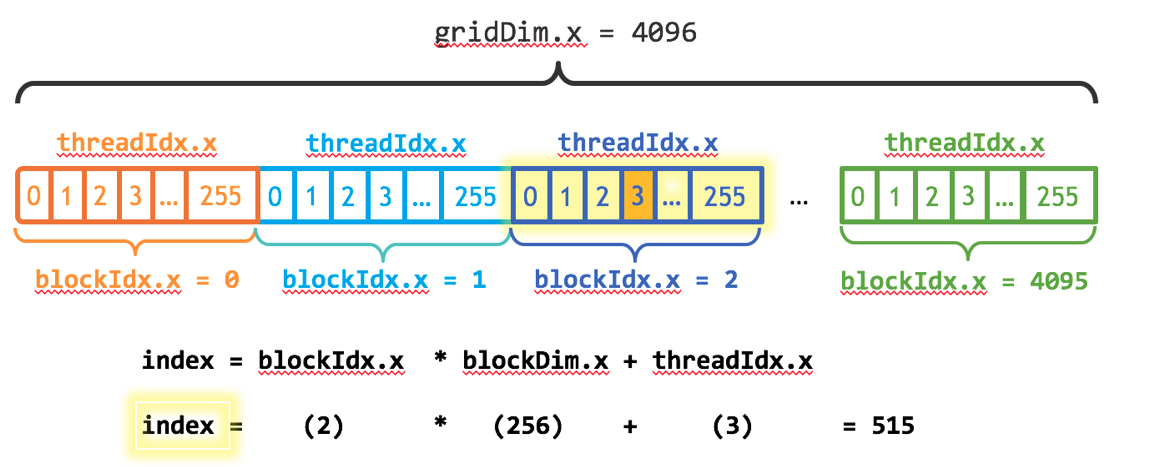

update the kernel code to take into account the entire grid of thread blocks. CUDA provides gridDim.x, which contains the number of blocks in the grid, and blockIdx.x, which contains the index of the current thread block in the grid. Figure 1 illustrates the the approach to indexing into an array (one-dimensional) in CUDA using blockDim.x, gridDim.x, and threadIdx.x. The idea is that each thread gets its index by computing the offset to the beginning of its block (the block index times the block size: blockIdx.x * blockDim.x) and adding the thread’s index within the block (threadIdx.x). The code blockIdx.x * blockDim.x + threadIdx.x is idiomatic CUDA.

Compilamos el archivo suma5.cu

In [ ]:
!/usr/local/cuda/bin/nvcc -arch=sm_37 -rdc=true suma5.cu -o suma5 -lcudadevrt

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).


In [ ]:
!ls

mult_mat_cpu	  stencil1d1	 suma0	       suma2.cu  suma5.cu
mult_mat_cpu.cu   stencil1d1.cu  suma0.cu      suma3	 suma_mat
mult_mat_gpu1	  stencil1d2	 suma1	       suma3.cu  suma_mat.cu
mult_mat_gpu1.cu  stencil1d2.cu  suma1.cu      suma4	 suma_prop
mult_mat_gpu2	  stencil1d3	 suma1sinarch  suma4.cu  suma_prop.cu
mult_mat_gpu2.cu  stencil1d3.cu  suma2	       suma5


Corremos el fichero ejecutable

In [ ]:
!./suma5

Tiempo del cálculo suma 5 : 0.075000 ms
Tiempo con el synchronize  : 2.484000 ms
Suma de 1048576 elementos
Número de errores: 0
Max error: 0


Hacemos el profile de ejecución

In [ ]:
!nvprof ./suma5

==4251== NVPROF is profiling process 4251, command: ./suma5
Tiempo del cálculo suma 5 : 0.057000 ms
Tiempo con el synchronize  : 2.701000 ms
Suma de 1048576 elementos
Número de errores: 0
Max error: 0
==4251== Profiling application: ./suma5
==4251== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:  100.00%  2.6219ms         1  2.6219ms  2.6219ms  2.6219ms  add(int, float*, float*)
      API calls:   98.31%  226.14ms         2  113.07ms  54.901us  226.08ms  cudaMallocManaged
                    1.12%  2.5701ms         1  2.5701ms  2.5701ms  2.5701ms  cudaDeviceSynchronize
                    0.26%  589.80us         2  294.90us  292.04us  297.75us  cudaFree
                    0.21%  479.05us         1  479.05us  479.05us  479.05us  cuDeviceTotalMem
                    0.07%  160.18us       101  1.5850us     152ns  68.422us  cuDeviceGetAttribute
                    0.02%  42.118us         1  42.118us  42.118us  42.118us 

#P8 Compare con el tiempo de ejecución con el resto de ejemplos anteriores.¿Que puede deducir de estos comportamientos?


Para este caso el tiempo de ejecucion ha sido menor a todos los anteriores. Esto es así puesto que aprovecha de manera considerada los recursos de CUDA utilizando un número de bloques ajustado al número de threads. Además, en la función _add_ se utiliza un codigo para sumar vectores que no dependerá ni del tamaño del vector ni del grid, ajustandose a cada suma.

# P9 Pruebe el último ejercicio con más threads por bloque y explique los resultados obtenidos.

In [ ]:
!sed -i '/#define THREADS/c\#define THREADS 512' suma5.cu
!/usr/local/cuda/bin/nvcc -arch=sm_37 -rdc=true suma5.cu -o suma5 -lcudadevrt
!nvprof ./suma5

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).
==4296== NVPROF is profiling process 4296, command: ./suma5
Tiempo del cálculo suma 5 : 0.047000 ms
Tiempo con el synchronize  : 2.780000 ms
Suma de 1048576 elementos
Número de errores: 0
Max error: 0
==4296== Profiling application: ./suma5
==4296== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:  100.00%  2.7120ms         1  2.7120ms  2.7120ms  2.7120ms  add(int, float*, float*)
      API calls:   98.56%  263.22ms         2  131.61ms  37.359us  263.18ms  cudaMallocManaged
                    1.00%  2.6616ms         1  2.6616ms  2.6616ms  2.6616ms  cudaDeviceSynchronize
                    0.23%  609.95us         2  304.98us  299.81us  310.14us  cudaFree
                    0.13%  341.66us         1  341.66u

In [ ]:
!sed -i '/#define THREADS/c\#define THREADS 1024' suma5.cu
!/usr/local/cuda/bin/nvcc -arch=sm_37 -rdc=true suma5.cu -o suma5 -lcudadevrt
!nvprof ./suma5

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).
==4341== NVPROF is profiling process 4341, command: ./suma5
Tiempo del cálculo suma 5 : 0.065000 ms
Tiempo con el synchronize  : 2.851000 ms
Suma de 1048576 elementos
Número de errores: 0
Max error: 0
==4341== Profiling application: ./suma5
==4341== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:  100.00%  2.7751ms         1  2.7751ms  2.7751ms  2.7751ms  add(int, float*, float*)
      API calls:   98.48%  267.02ms         2  133.51ms  46.342us  266.98ms  cudaMallocManaged
                    1.02%  2.7527ms         1  2.7527ms  2.7527ms  2.7527ms  cudaDeviceSynchronize
                    0.24%  658.18us         2  329.09us  319.14us  339.03us  cudaFree
                    0.17%  457.67us         1  457.67u

Sigue aprovechando de manera correcta CUDA, pero se puede observar que para este caso no es necesario subir el número de threads.

# P10 Modifique el último ejercicio variando N para tamaños que no sean múltiplos del número de threads por bloque que se esté usando.

In [ ]:
!sed -i '/#define THREADS/c\#define THREADS 517' suma5.cu
!sed -i '/#define TAM/c\#define TAM 77' suma5.cu
!/usr/local/cuda/bin/nvcc -arch=sm_35 -rdc=true suma5.cu -o suma5 -lcudadevrt
!nvprof ./suma5

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).
==4387== NVPROF is profiling process 4387, command: ./suma5
Tiempo del cálculo suma 5 : 0.085000 ms
Tiempo con el synchronize  : 313.776000 ms
Suma de 80740352 elementos
Número de errores: 0
Max error: 0
==4387== Profiling application: ./suma5
==4387== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:  100.00%  313.68ms         1  313.68ms  313.68ms  313.68ms  add(int, float*, float*)
      API calls:   49.99%  313.59ms         1  313.59ms  313.59ms  313.59ms  cudaDeviceSynchronize
                   37.89%  237.69ms         2  118.84ms  47.241us  237.64ms  cudaMallocManaged
                   12.03%  75.443ms         2  37.722ms  33.238ms  42.206ms  cudaFree
                    0.06%  373.95us         1  373.

Se puede observar que se siguen sin tener errores pero que el tiempo de ejecucion es mucho mayor a los anteriores.

# **Ejercicio 2: suma de matrices**

En este ejercicio se nos propone extender el codigo de los ejemplos anteriores para que realice la resta (o suma) de matrices cuadradas de dimension N.

La idea sera basarse en el código anterior, en concreto la version que trabaja sin condiciones de carrera. Con ello obtenemos el siguiente código:

In [ ]:
%%writefile suma_mat.cu

#include <iostream>
#include <math.h>
#include <time.h>
#include <sys/time.h>

#define R 1024
#define C 1024
#define TPB 8

__global__ void add_matrices(int r, int c, float *x, float *y) {
  int i = threadIdx.x + blockIdx.x * blockDim.x;
  int j = threadIdx.y + blockIdx.y * blockDim.y;
  int index = i*c + j;
  
  if (i < r && j < c)
    y[index] = x[index] + y[index];
}

int main(void) {
  float *x; 
  float *y;

  cudaMallocManaged(&x, C*R*sizeof(float));
  cudaMallocManaged(&y, C*R*sizeof(float));
  
  // Inicializamos los datos
  for (int i =0; i < R; i++ ){
      for (int j = 0; j < C; j++){
          x[i*C + j] = 1.0f;
          y[i*C + j] = 2.0f;
      }
  }

  // Definimos la dimensión del grid 
  dim3 dimGrid ((R + TPB - 1)/TPB , (C + TPB - 1)/TPB, 1);
  
  // Definimos la dimensión del bloque
  dim3 dimBlock(TPB, TPB, 1);

  // Lanzamos la función en el dispositivo.
  add_matrices<<<dimGrid, dimBlock>>>(R, C, x, y);

  cudaDeviceSynchronize();

  float errormaximo = 0.0f;
  int cont = 0;
  for (int i=0; i <R; i++){
    for (int j =0; j < C; j++) {
      errormaximo=fmax(errormaximo,fabs(y[i*C + j]-3.0f));
      if (y[i*C+j] != 3.0f) cont++;
    }
  }

  std::cout << "Suma de " << R*C << " elementos de las matrices" << std::endl;
  std::cout << "Número de Errores: " <<cont << std::endl;
  std::cout << "Max error: " <<errormaximo << std::endl;

  cudaFree (x);
  cudaFree (y);
  return 0;
}

Overwriting suma_mat.cu


En el codigo anterior se han utilizados bloques cuadrados de 8 x 8 threads de manera que se aproveche al máximo la granularidad de los bloques. Además gracias a _deviceQuery_ sabemos que el numero maximo de threads y el numero maximo de threads por bloque es 1024.

De esta manera, con bloques de 8x8 = 64 threads se podrá llegar a un máximo de 16 bloques por SM sin violar ninguna restriccion y maximizando el numero de threads por SM.

Compilamos el archivo:

In [ ]:
!/usr/local/cuda/bin/nvcc -arch=sm_37 -rdc=true suma_mat.cu -o suma_mat -lcudadevrt

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).


Ejecutamos el código:

In [ ]:
!nvprof ./suma_mat

==4433== NVPROF is profiling process 4433, command: ./suma_mat
Suma de 1048576 elementos de las matrices
Número de Errores: 0
Max error: 0
==4433== Profiling application: ./suma_mat
==4433== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:  100.00%  2.7975ms         1  2.7975ms  2.7975ms  2.7975ms  add_matrices(int, int, float*, float*)
      API calls:   98.52%  309.84ms         2  154.92ms  35.241us  309.81ms  cudaMallocManaged
                    0.89%  2.8047ms         1  2.8047ms  2.8047ms  2.8047ms  cudaDeviceSynchronize
                    0.30%  935.66us         2  467.83us  463.31us  472.34us  cudaFree
                    0.19%  591.08us         1  591.08us  591.08us  591.08us  cuDeviceTotalMem
                    0.07%  209.00us       101  2.0690us     186ns  87.356us  cuDeviceGetAttribute
                    0.02%  60.748us         1  60.748us  60.748us  60.748us  cudaLaunchKernel
                    0.01%  

# **Ejercicio 3: Stencil1d**

## Versión sin memoria compartida

En este apartado se va a programar una version de stencil con radio 3 y sin usar memoria compartida.

In [ ]:
%%writefile stencil1d1.cu

#include <stdio.h>

#define RADIO        3
#define BLOCK_TAM    256
#define NUM_ELEMEN  (4096*2)

// CUDA API error checking macro
#define cudaCheck(error) \
  if (error != cudaSuccess) { \
    printf("Fatal error: %s at %s:%d\n", \
      cudaGetErrorString(error), \
      __FILE__, __LINE__); \
    exit(1); \
  }

__global__ void stencil_1d(int *in, int *out) {
    // Índice global de la posición central de los datos que va a usar el thread
    int index = threadIdx.x + (blockIdx.x * blockDim.x) + RADIO;

    // Realizamos la operación del stencil
    int result = 0;
    for (int offset = -RADIO; offset <= RADIO; offset++)
        result += in[index + offset];

    // Guardamos el resultado
    out[index-RADIO] = result;
}

int main() {
  unsigned int i;
  int h_in[NUM_ELEMEN + 2 * RADIO], h_out[NUM_ELEMEN];
  int *d_in, *d_out;

  // Incializamos los datos en el host
  for( i = 0; i < (NUM_ELEMEN + 2*RADIO); ++i )
    // Con un valor de 1 y un radio de RADIO, el array de resultados debería
    // ser de 2*RADIO+1
    h_in[i] = 1; 

  // Reservamos memoria en el dispositivo
  cudaCheck( cudaMalloc( &d_in, (NUM_ELEMEN + 2*RADIO) * sizeof(int)) );
  cudaCheck( cudaMalloc( &d_out, NUM_ELEMEN * sizeof(int)) );

  // Copiamos los datos en la GPU
  cudaCheck( cudaMemcpy( d_in, h_in, (NUM_ELEMEN + 2*RADIO) * sizeof(int), cudaMemcpyHostToDevice) );

  // Aplicamos el spencil
  stencil_1d<<< (NUM_ELEMEN + BLOCK_TAM - 1)/BLOCK_TAM, BLOCK_TAM >>> (d_in, d_out);

  // Copiamos los resultados
  cudaCheck( cudaMemcpy( h_out, d_out, NUM_ELEMEN * sizeof(int), cudaMemcpyDeviceToHost) );

  // Verificamos que se ha hecho correctamente
  int expected_res = 2*RADIO+1;
  for( i = 0; i < NUM_ELEMEN; ++i ) {
    if (h_out[i] != expected_res)
    {
      printf("Element h_out[%d] == %d != %d\n", i, h_out[i], expected_res);
      break;
    }
  }

  if (i == NUM_ELEMEN)
    printf("SUCCESS!\n");

  // Liberamos memoria
  cudaFree(d_in);
  cudaFree(d_out);

  return 0;
}

Overwriting stencil1d1.cu


In [ ]:
!/usr/local/cuda/bin/nvcc -arch=sm_37 -rdc=true stencil1d1.cu -o stencil1d1 -lcudadevrt
!nvprof ./stencil1d1

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).
==4477== NVPROF is profiling process 4477, command: ./stencil1d1
SUCCESS!
==4477== Profiling application: ./stencil1d1
==4477== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   36.64%  5.3120us         1  5.3120us  5.3120us  5.3120us  [CUDA memcpy HtoD]
                   33.11%  4.8000us         1  4.8000us  4.8000us  4.8000us  stencil_1d(int*, int*)
                   30.24%  4.3840us         1  4.3840us  4.3840us  4.3840us  [CUDA memcpy DtoH]
      API calls:   99.62%  221.53ms         2  110.77ms  4.5540us  221.53ms  cudaMalloc
                    0.20%  438.05us         1  438.05us  438.05us  438.05us  cuDeviceTotalMem
                    0.06%  142.14us       101  1.4070us     126ns  60.307us  cuDevic

Si observamos los tiempos anteriores nos damos cuenta que la mayoria de tiempo la GPU se dedica a la copia de elementos. Esto es así puesto que accede muchas veces a cada elemento del array de entrada. En concreto vemos que se dedica un 36,11% a la copia de host a device y un 29,27% de de device a host.

## Versión con memoria compartida sin sincronización de threads

Para realizar este apartado se ha añadido el comando *`__shared__`* de manera que se utilice la memoria compartida. De este modo, se evitan los accesos de manera repetida al vector. Para esto, en cada bloque cada thread copia en la memoria compartida el elemento oportuno.

En este caso, no se usará el comando *__syncthreads()* para sincronizar los threads.

In [ ]:
%%writefile stencil1d2.cu

#include <stdio.h>

#define RADIO        3
#define BLOCK_TAM    256
#define NUM_ELEMEN  (4096*2)

// CUDA API error checking macro
#define cudaCheck(error) \
  if (error != cudaSuccess) { \
    printf("Fatal error: %s at %s:%d\n", \
      cudaGetErrorString(error), \
      __FILE__, __LINE__); \
    exit(1); \
  }

__global__ void stencil_1d(int *in, int *out) 
{
    //Se reserva la memoria compartida
    __shared__ int temp [BLOCK_TAM + 2 * RADIO];

    // Índice global de la posición central de los datos que va a usar el thread
    int gindex = threadIdx.x + (blockIdx.x * blockDim.x) + RADIO;

    //Indice local de la posicion central
    int lindex = threadIdx.x + RADIO;

    //Se cargan en la memoria compartida
    temp[lindex] = in[gindex];
    if(threadIdx.x < RADIO){
      temp[lindex - RADIO] = in[gindex - RADIO];
      temp[lindex + BLOCK_TAM] = in[gindex + BLOCK_TAM];
    }

    // Realizamos la operación del stencil
    int result = 0;
    for (int offset = -RADIO; offset <= RADIO; offset++)
        result += temp[lindex + offset];

    // Guardamos el resultado
    out[gindex-RADIO] = result;
}

int main()
{

  int errores[100] = {0};

  //Se ejecuta el codigo 100 veces
  for(int j = 0; j < 100; j++){
    unsigned int i;
    int h_in[NUM_ELEMEN + 2 * RADIO], h_out[NUM_ELEMEN];
    int *d_in, *d_out;

    // Incializamos los datos en el host
    for( i = 0; i < (NUM_ELEMEN + 2*RADIO); ++i )
      h_in[i] = 1; 

    // Reservamos memoria en el dispositivo
    cudaCheck( cudaMalloc( &d_in, (NUM_ELEMEN + 2*RADIO) * sizeof(int)) );
    cudaCheck( cudaMalloc( &d_out, NUM_ELEMEN * sizeof(int)) );

    // Copiamos los datos en la GPU
    cudaCheck( cudaMemcpy( d_in, h_in, (NUM_ELEMEN + 2*RADIO) * sizeof(int), cudaMemcpyHostToDevice) );

    // Aplicamos el spencil
    stencil_1d<<< (NUM_ELEMEN + BLOCK_TAM - 1)/BLOCK_TAM, BLOCK_TAM >>> (d_in, d_out);

    // Copiamos los resultados
    cudaCheck( cudaMemcpy( h_out, d_out, NUM_ELEMEN * sizeof(int), cudaMemcpyDeviceToHost) );

    // Verificamos que se ha hecho correctamente
    int expected_res = 2*RADIO+1;
    for( i = 0; i < NUM_ELEMEN; ++i ) {
      if (h_out[i] != expected_res)
      {
        //printf("Element h_out[%d] == %d != %d\n", i, h_out[i], expected_res);
        errores[j]++;
        break;
      }
    }

    // Liberamos memoria
    cudaFree(d_in);
    cudaFree(d_out);
    cudaDeviceReset();
  }

  //Se cuentan los errores
  int max_err=0;
  int num_err=0;
  for (int j = 0; j < 100; j++){
    num_err += errores[j];
    if(errores[j] > max_err)
      max_err=errores[j];
  }

  printf("Se han realizado 100 ejecuciones independendientes.\n");
  printf("Número total de errores: %d\n",num_err);
  printf("Máximo error en una ejecución: %d\n", max_err);


  return 0;
}

Overwriting stencil1d2.cu


In [ ]:
!/usr/local/cuda/bin/nvcc -arch=sm_37 -rdc=true stencil1d2.cu -o stencil1d2 -lcudadevrt
!nvprof ./stencil1d2

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).
==4521== NVPROF is profiling process 4521, command: ./stencil1d2
Se han realizado 100 ejecuciones independendientes.
Número total de errores: 100
Máximo error en una ejecución: 1
==4521== Profiling application: ./stencil1d2
==4521== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   38.50%  584.21us       100  5.8420us  5.0880us  10.912us  [CUDA memcpy HtoD]
                   32.28%  489.94us       100  4.8990us  4.6720us  13.408us  stencil_1d(int*, int*)
                   29.22%  443.44us       100  4.4340us  4.3510us  5.4400us  [CUDA memcpy DtoH]
      API calls:   74.32%  18.2317s       200  91.158ms  4.1190us  241.34ms  cudaMalloc
                   25.59%  6.27691s       100  62.769ms  58.802ms  89.897

En este caso los tiempos son similares a los del anterior caso. El problema es que a la hora de ejecutarlo aparecen 100 errores para las 100 ejecuciones independientes. Esto se produce a causa que tras leer los datos como los threads no estan sincronizados, es muy posible que algunos de ellos empiecen el cálculo del stencil antes de que esten todos los datos en la memoria compartida.

## Version con memoria compartida y sincronizción de threads

In [ ]:
%%writefile stencil1d3.cu

#include <stdio.h>

#define RADIO        3
#define BLOCK_TAM    256
#define NUM_ELEMEN  (4096*2)

// CUDA API error checking macro
#define cudaCheck(error) \
  if (error != cudaSuccess) { \
    printf("Fatal error: %s at %s:%d\n", \
      cudaGetErrorString(error), \
      __FILE__, __LINE__); \
    exit(1); \
  }

__global__ void stencil_1d(int *in, int *out) {

    //Se reserva la memoria compartida
    __shared__ int temp [BLOCK_TAM + 2 * RADIO];

    // Índice global de la posición central de los datos que va a usar el thread
    int gindex = threadIdx.x + (blockIdx.x * blockDim.x) + RADIO;

    //Indice local de la posicion central
    int lindex = threadIdx.x + RADIO;

    //Se cargan en la memoria compartida
    temp[lindex] = in[gindex];
    if(threadIdx.x < RADIO){
      temp[lindex - RADIO] = in[gindex - RADIO];
      temp[lindex + BLOCK_TAM] = in[gindex + BLOCK_TAM];
    }

    __syncthreads();

    // Realizamos la operación del stencil
    int result = 0;
    for (int offset = -RADIO; offset <= RADIO; offset++)
        result += temp[lindex + offset];

    // Guardamos el resultado
    out[gindex-RADIO] = result;
}

int main() {

  int errores[100] = {0};

  //Se ejecuta el codigo 100 veces
  for(int j = 0; j < 100; j++){
    unsigned int i;
    int h_in[NUM_ELEMEN + 2 * RADIO], h_out[NUM_ELEMEN];
    int *d_in, *d_out;

    // Incializamos los datos en el host
    for( i = 0; i < (NUM_ELEMEN + 2*RADIO); ++i )
      h_in[i] = 1; 

    // Reservamos memoria en el dispositivo
    cudaCheck( cudaMalloc( &d_in, (NUM_ELEMEN + 2*RADIO) * sizeof(int)) );
    cudaCheck( cudaMalloc( &d_out, NUM_ELEMEN * sizeof(int)) );

    // Copiamos los datos en la GPU
    cudaCheck( cudaMemcpy( d_in, h_in, (NUM_ELEMEN + 2*RADIO) * sizeof(int), cudaMemcpyHostToDevice) );

    // Aplicamos el spencil
    stencil_1d<<< (NUM_ELEMEN + BLOCK_TAM - 1)/BLOCK_TAM, BLOCK_TAM >>> (d_in, d_out);

    // Copiamos los resultados
    cudaCheck( cudaMemcpy( h_out, d_out, NUM_ELEMEN * sizeof(int), cudaMemcpyDeviceToHost) );

    // Verificamos que se ha hecho correctamente
    int expected_res = 2*RADIO+1;
    for( i = 0; i < NUM_ELEMEN; ++i ) {
      if (h_out[i] != expected_res)
      {
        //printf("Element h_out[%d] == %d != %d\n", i, h_out[i], expected_res);
        errores[j]++;
        break;
      }
    }

    // Liberamos memoria
    cudaFree(d_in);
    cudaFree(d_out);
    cudaDeviceReset();
  }

  //Se cuentan los errores
  int max_err=0;
  int num_err=0;
  for (int j = 0; j < 100; j++){
    num_err += errores[j];
    if(errores[j] > max_err)
      max_err=errores[j];
  }

  printf("Se han realizado 100 ejecuciones independendientes.\n");
  printf("Número total de errores: %d\n",num_err);
  printf("Máximo error en una ejecución: %d\n", max_err);


  return 0;
}

Overwriting stencil1d3.cu


In [ ]:
!/usr/local/cuda/bin/nvcc -arch=sm_37 -rdc=true stencil1d3.cu -o stencil1d3 -lcudadevrt
!nvprof ./stencil1d3

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).
==4668== NVPROF is profiling process 4668, command: ./stencil1d3
Se han realizado 100 ejecuciones independendientes.
Número total de errores: 0
Máximo error en una ejecución: 0
==4668== Profiling application: ./stencil1d3
==4668== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   38.36%  598.90us       100  5.9890us  5.1200us  17.152us  [CUDA memcpy HtoD]
                   33.12%  517.14us       100  5.1710us  4.8960us  15.007us  stencil_1d(int*, int*)
                   28.52%  445.24us       100  4.4520us  4.3510us  6.6880us  [CUDA memcpy DtoH]
      API calls:   74.60%  18.3031s       200  91.516ms  3.9320us  231.81ms  cudaMalloc
                   25.31%  6.20907s       100  62.091ms  58.603ms  83.685ms

En este caso no se han producido errores como en el caso anterior puesto que hemos sincronizado los datos con el comando *__syncthreads()* antes de comenzar los cálculos. Tambien se puede observar que hemos conseguido reducir el tiempo de copia del CPU->GPU utilizando la memoria local.

Puede que la reduccion de tiempos no es muy grande, pero este debe a que se esta utilizando un vector y un radio bastante pequeño. Para ello, se podría aumentar ambos.

# **Ejercicio opcional: Producto de matrices en GPU**

Para este ejercicio se ha decidido comparar la multiplicacion de matrices mediante CPU y GPU.


# Multiplicación con CPU

Aquí esta el código para realizar la multiplicación con la CPU.

In [ ]:
%%writefile mult_mat_cpu.cu

#include <stdio.h>

#define N 64

void matrixMultCPU(float a[N][N], float b[N][N], float c[N][N]) {
for (int i = 0; i < N; i++) {
 for (int j = 0; j < N; j++) {
 float sum = 0;
 for (int k = 0; k < N; k++) {
 sum += a[i][k] * b[k][j];
 }
 c[i][j] = sum;
 }
}
}

int main() {
  float a[N][N], b[N][N], c[N][N];

  cudaEvent_t start, stop;
  cudaEventCreate(&start);
  cudaEventCreate(&stop);

  /* inicializando variables con datos*/
  for (int i = 0; i < N; i++) {
    for (int j = 0; j < N; j++) {
      a[i][j] = 1.0;
      b[i][j] = 2.0;
    }
  }

  int nIter=1000;
  cudaEventRecord(start);
  for (int i = 0; i < nIter; i++)
    matrixMultCPU(a, b, c);

  cudaEventRecord(stop);
  cudaEventSynchronize(stop);

  float msecTotal = 0.0;
  cudaEventElapsedTime(&msecTotal, start, stop);

  // Comprueba resultados
  int errores = 0;
  for (int y = 0; y < N; y++) {
    for (int x = 0; x < N; x++) {
        if (c[y][x] != 2*N) {
          errores++;
        }
    }
  }

  printf("Matrices de: %d x %d\n", N, N);
  printf("La ejecución ha salido ");
  if (errores == 0){
    printf("exitosa\n");
  }
  else {
    printf("erronea. Errores: %d\n", errores);
    return 1;
  }

  float msecPerKernelExecution = msecTotal / nIter;
  double flopsPerMMull = 2.0 * N * N * N;
  double gigaFlops = (flopsPerMMull * 1.0e-9) /
    (msecPerKernelExecution / 1000.0);

  printf("Tiempo medio: %f ms\n", msecPerKernelExecution);
  printf("GFLOPS: %f\n", gigaFlops);
  return 0;
}

Overwriting mult_mat_cpu.cu


In [ ]:
!/usr/local/cuda/bin/nvcc -arch=sm_35 -rdc=true mult_mat_cpu.cu -o mult_mat_cpu -lcudadevrt
!./mult_mat_cpu

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).
Matrices de: 64 x 64
La ejecución ha salido exitosa
Tiempo medio: 0.778756 ms
GFLOPS: 0.673238


# Multiplicación en GPU

En este apartado se realizará la implementación de la multiplicación de la GPU. Para ello se ha utilizado bloques de 8x8 threads de manera que se aproveche al máximo el paralelismo. Por otro lado se utiliza un número de bloques igual a (N +7)8.

## Sin memoria compartida

Primero se implementa el código más sencillo que se trata de la multiplicación de matrices sin memoria compartida.

In [ ]:
%%writefile mult_mat_gpu1.cu

#include <stdio.h>

#define N 64
#define TPB 8

__global__ void matrixMultGPU(int n, float *a, float *b, float *c) {
  int k;
  float sum = 0;
  int col = threadIdx.x + blockDim.x * blockIdx.x;
  int row = threadIdx.y + blockDim.y * blockIdx.y;
  
  if (row < n && col < n) {
    for (k = 0; k < n; k++) {
      sum += a[row * n + k] * b[k * n + col];
    }
    c[row * n + col] = sum;
  }
}

int main() {
  float a[N][N], b[N][N], c[N][N];
  float *dev_a, *dev_b, *dev_c;
  int size = N * N * sizeof(float);

  cudaEvent_t start, stop;
  cudaEventCreate(&start);
  cudaEventCreate(&stop);

  cudaMalloc((void **) &dev_a, size);
  cudaMalloc((void **) &dev_b, size);
  cudaMalloc((void **) &dev_c, size);

  for (int i = 0; i < N; i++) {
    for (int j = 0; j < N; j++) {
      a[i][j] = 1.0;
      b[i][j] = 2.0;
    }
  }

  cudaMemcpy(dev_a, a, size, cudaMemcpyHostToDevice);
  cudaMemcpy(dev_b, b, size, cudaMemcpyHostToDevice);

  // Tamaño de grid y bloque
  dim3 dimGrid((N+TPB-1)/TPB, (N+TPB-1)/TPB);
  dim3 dimBlock(TPB, TPB);

  int nIter=1000;
  cudaEventRecord(start);
  for (int i=0; i <nIter; i++) {
    matrixMultGPU<<<dimGrid, dimBlock>>>(N, dev_a, dev_b, dev_c);
  }
  cudaEventRecord(stop);
  cudaEventSynchronize(stop);

  cudaMemcpy(c, dev_c, size, cudaMemcpyDeviceToHost);

  float msecTotal = 0.0;
  cudaEventElapsedTime(&msecTotal, start, stop);

  int errores = 0;
  for (int y = 0; y < N; y++) {
    for (int x = 0; x < N; x++) {
        if (c[y][x] != 2*N) {
          errores++;
        }
    }
  }

  cudaFree(dev_a);
  cudaFree(dev_b);
  cudaFree(dev_c);

  printf("Matrices de: %d x %d\n", N, N);
  printf("La ejecución ha salido ");
  if (errores == 0){
    printf("exitosa\n");
  }
  else {
    printf("erronea. Errores: %d\n", errores);
    return 1;
  }

  float msecPerKernelExecution = msecTotal / nIter;
  double flopsPerMMull = 2.0 * N * N * N;
  double gigaFlops = (flopsPerMMull * 1.0e-9) /
    (msecPerKernelExecution / 1000.0);

  printf("Tiempo medio: %f ms\n", msecPerKernelExecution);
  printf("GFLOPS: %f\n", gigaFlops);
  return 0;
}

Overwriting mult_mat_gpu1.cu


In [ ]:
!/usr/local/cuda/bin/nvcc -arch=sm_35 -rdc=true mult_mat_gpu1.cu -o mult_mat_gpu1 -lcudadevrt
!nvprof ./mult_mat_gpu1

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).
==4853== NVPROF is profiling process 4853, command: ./mult_mat_gpu1
Matrices de: 64 x 64
La ejecución ha salido exitosa
Tiempo medio: 0.010971 ms
GFLOPS: 47.786828
==4853== Profiling application: ./mult_mat_gpu1
==4853== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   99.87%  9.6469ms      1000  9.6460us  9.3760us  20.160us  matrixMultGPU(int, float*, float*, float*)
                    0.10%  9.6000us         2  4.8000us  4.6720us  4.9280us  [CUDA memcpy HtoD]
                    0.03%  3.0720us         1  3.0720us  3.0720us  3.0720us  [CUDA memcpy DtoH]
      API calls:   94.50%  199.23ms         2  99.615ms     840ns  199.23ms  cudaEventCreate
                    3.12%  6.5755ms         1  6.5755ms  6.5

Vemos que para este caso no se producen errores de ningún tipo. Además el tiempo medio ha disminuido respecto de la multiplicación con la CPU.

## Con memoria compartida y optimizaciones adicionales

Para este apartado vamos a realizar optimizaciones adicionales. Algunas de estas son:


*   Se utilizará memoria compartida para el acceso de datos. De esta forma, se hara el producto de matrices por bloques, de manera independiente y optimizando el acceso a la memoria. Así, conseguiremos que las matrices se carguen solo N/8 veces y no N veces como antes. Para ello se utilizara el comando *__syncthreads()* para asegurarnos de la sincronizacion necesaria.
*Se desenrollaran los bucles para optimizar el compilador. Utilizaremos para ello *#pragma unroll*.






In [ ]:
%%writefile mult_mat_gpu2.cu

#include <stdio.h>

#define N 64
#define TPB 8

__global__ void matrixMultGPU2(int n, float* A, float* B, float* C) {
    float sum = 0;
    int tile;
    int tx = threadIdx.x;
    int ty = threadIdx.y;
    int i = blockIdx.x * blockDim.x + tx;
    int j = blockIdx.y * blockDim.y + ty;

      __shared__ float As[TPB][TPB];
      __shared__ float Bs[TPB][TPB];

      for (tile = 0; tile < (n+TPB-1)/TPB; tile++){

          if ((ty + (tile*TPB))<n && i < n)
            As[ty][tx] = A[(i * n) + (ty + (tile*TPB))];
          else
            As[ty][tx] = 0.0;
          if ((tx + (tile*TPB))<n && j < n)
            Bs[ty][tx] = B[((tx + (tile * TPB))*n) + j];
          else
            Bs[ty][tx] = 0.0;

            __syncthreads();

            for (int k = 0; k < TPB; k++)
              sum += As[k][tx] * Bs[ty][k];

            __syncthreads();
      }
      // Escribe en paralelo los resultados obtenidos por el bloque
      if (i < n && j < n)
        C[i * n + j] = sum;
}

int main() {
  float a[N][N], b[N][N], c[N][N];
  float *dev_a, *dev_b, *dev_c;
  int size = N * N * sizeof(float);

  cudaEvent_t start, stop;
  cudaEventCreate(&start);
  cudaEventCreate(&stop);

  cudaMalloc((void **) &dev_a, size);
  cudaMalloc((void **) &dev_b, size);
  cudaMalloc((void **) &dev_c, size);

  for (int i = 0; i < N; i++) {
    for (int j = 0; j < N; j++) {
      a[i][j] = 1.0;
      b[i][j] = 2.0;
    }
  }

  cudaMemcpy(dev_a, a, size, cudaMemcpyHostToDevice);
  cudaMemcpy(dev_b, b, size, cudaMemcpyHostToDevice);

  dim3 dimGrid((N+TPB-1)/TPB, (N+TPB-1)/TPB);
  dim3 dimBlock(TPB, TPB);

  int nIter=1000;
  cudaEventRecord(start);
  for (int i=0; i <nIter; i++) {
    matrixMultGPU2<<<dimGrid, dimBlock>>>(N, dev_a, dev_b, dev_c);
  }
  cudaEventRecord(stop);
  cudaEventSynchronize(stop);

  cudaMemcpy(c, dev_c, size, cudaMemcpyDeviceToHost);

  float msecTotal = 0.0;
  cudaEventElapsedTime(&msecTotal, start, stop);

  int errores = 0;
  for (int y = 0; y < N; y++) {
    for (int x = 0; x < N; x++) {
        if (c[y][x] != 2*N) {
          errores++;
        }
    }
  }

  cudaFree(dev_a);
  cudaFree(dev_b);
  cudaFree(dev_c);

  printf("Matrices de: %d x %d\n", N, N);
  printf("La ejecución ha salido ");
  if (errores == 0){
    printf("exitosa\n");
  }
  else {
    printf("erronea. Errores: %d\n", errores);
    return 1;
  }

  float msecPerKernelExecution = msecTotal / nIter;
  double flopsPerMMull = 2.0 * N * N * N;
  double gigaFlops = (flopsPerMMull * 1.0e-9) /
    (msecPerKernelExecution / 1000.0);

  printf("GFLOPS: %f\n", gigaFlops);
  return 0;
}

Overwriting mult_mat_gpu2.cu


In [ ]:
!/usr/local/cuda/bin/nvcc -arch=sm_35 -rdc=true mult_mat_gpu2.cu -o mult_mat_gpu2 -lcudadevrt
!nvprof ./mult_mat_gpu2

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).
==4897== NVPROF is profiling process 4897, command: ./mult_mat_gpu2
Matrices de: 64 x 64
La ejecución ha salido exitosa
GFLOPS: 44.938397
==4897== Profiling application: ./mult_mat_gpu2
==4897== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   99.90%  10.358ms      1000  10.358us  10.207us  14.592us  matrixMultGPU2(int, float*, float*, float*)
                    0.06%  6.5600us         2  3.2800us  2.9120us  3.6480us  [CUDA memcpy HtoD]
                    0.03%  3.4560us         1  3.4560us  3.4560us  3.4560us  [CUDA memcpy DtoH]
      API calls:   94.59%  216.63ms         2  108.32ms  1.1150us  216.63ms  cudaEventCreate
                    2.88%  6.6008ms         1  6.6008ms  6.6008ms  6.6008ms  cudaEven

Además se puede probar a incrementar el tamaño de las maytrices para que no sean potencia de dos e incluso se pued evariar el numero de hilos por bloque.

In [ ]:
!sed -i '/#define N/c\#define N 200' mult_mat_gpu2.cu
!sed -i '/#define TPB/c\#define TPB 32' mult_mat_gpu2.cu
!/usr/local/cuda/bin/nvcc -arch=sm_35 -rdc=true mult_mat_gpu2.cu -o mult_mat_gpu2 -lcudadevrt
!./mult_mat_gpu2

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).
Matrices de: 200 x 200
La ejecución ha salido exitosa
GFLOPS: 108.722075


# Medición de tiempos

Se va a realizar la comparación de tiempos siempre para tamaños de bloque de 8x8.

## Sin memoria compartida

In [ ]:
!sed -i '/#define TPB/c\#define TPB 8' mult_mat_gpu1.cu
!for i in 16 32 64 128 512; do sed -i "/#define N/c\#define N $i" mult_mat_gpu1.cu && /usr/local/cuda/bin/nvcc -arch=sm_35 -rdc=true mult_mat_gpu1.cu -o mult_mat_gpu1 -lcudadevrt && nvprof ./mult_mat_gpu1; done

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).
==5608== NVPROF is profiling process 5608, command: ./mult_mat_gpu1
Matrices de: 16 x 16
La ejecución ha salido exitosa
Tiempo medio: 0.005995 ms
GFLOPS: 1.366463
==5608== Profiling application: ./mult_mat_gpu1
==5608== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   99.89%  4.7073ms      1000  4.7070us  4.5120us  14.912us  matrixMultGPU(int, float*, float*, float*)
                    0.07%  3.2960us         2  1.6480us  1.4400us  1.8560us  [CUDA memcpy HtoD]
                    0.04%  2.0800us         1  2.0800us  2.0800us  2.0800us  [CUDA memcpy DtoH]
      API calls:   96.99%  216.36ms         2  108.18ms     896ns  216.36ms  cudaEventCreate
                    1.88%  4.2035ms      1000  4.2030us  3.05

**Sin memoria compartida, bloques de $8\times 8$, tiempos medios en $\mu$sec**

| Tamaño de matriz | CPU->GPU | GPU -> CPU | Ejecución | Ratio comparado con 128x128 | GFLOPs     |
|:------------------:|:----------:|:------------:|:-----------:|:-----------------------------:|:------------:|
| 16x16            | 1.64  | 2.08   | 4.71    |          0.01                  | 1.34   |
| 32x32            | 1.84 | 2.20    | 5.24   |               0.08              | 10  |
| 64x64            | 3.21 | 3.10    | 9.56   |              0.42               | 48.32     |
| 128x128          | 11.10  | 7.48    | 35.43  |                 1            | 114.44 |
| 512x512          | 97.39 | 93.94   | 842.12   |                 2.82            | 323.43 |

Se puede observar que las operaciones son bastante rápidas, pero a medida que sube el tamaño de la matriz será necesario plantear bloques de mayor tamaño.

## Con memoria compartida y optimizaciones

In [ ]:
!sed -i '/#define TPB/c\#define TPB 8' mult_mat_gpu2.cu
!for i in 16 32 64 128 512; do sed -i "/#define N/c\#define N $i" mult_mat_gpu2.cu && /usr/local/cuda/bin/nvcc -arch=sm_35 -rdc=true mult_mat_gpu2.cu -o mult_mat_gpu2 -lcudadevrt && nvprof ./mult_mat_gpu2; done

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).
==6137== NVPROF is profiling process 6137, command: ./mult_mat_gpu2
Matrices de: 16 x 16
La ejecución ha salido exitosa
GFLOPS: 1.282244
==6137== Profiling application: ./mult_mat_gpu2
==6137== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   99.90%  5.1166ms      1000  5.1160us  4.9910us  8.6080us  matrixMultGPU2(int, float*, float*, float*)
                    0.06%  3.2960us         2  1.6480us  1.4080us  1.8880us  [CUDA memcpy HtoD]
                    0.04%  2.0800us         1  2.0800us  2.0800us  2.0800us  [CUDA memcpy DtoH]
      API calls:   96.83%  222.52ms         2  111.26ms  1.3860us  222.52ms  cudaEventCreate
                    1.66%  3.8041ms      1000  3.8040us  3.0710us  24.218us  cudaLaunc

**Con memoria compartida, bloques de $8\times 8$, tiempos medios en $\mu$sec**

| Tamaño de matriz | CPU->GPU | GPU -> CPU | Ejecución | Ratio comparado con 128x128 | GFLOPs     |
|:------------------:|:----------:|:------------:|:-----------:|:-----------------------------:|:------------:|
| 16x16            | 1.64  | 2.08   | 5.11    |          0.01                  | 1.28   |
| 32x32            | 1.82 | 2.24    | 6.46   |               0.07              | 8.43  |
| 64x64            | 3.50 | 3.07   | 10.43   |              0.39               | 44.71     |
| 128x128          | 9.68  | 7    | 35.37  |                 1            | 114.49 |
| 512x512          |  109.58 | 81.150   | 792.28  |                 2.95            | 338.48 |

Si comparamos los datos en el caso de memoria compartida y sin memoria compartida para el caso de bloques de 8x8, se puede observar que en general es más rápido sin memoria compartida excepto para el caso de tamaños de matrices de 512x512. Esto se debe a que al principio no es necesario compartir la memoria puesto que son matrices pequeñas, pero a medida que crece la matriz agilizará el proceso dicha memoria compartida. Es decir, la aceleración solo se conseguirá para tamaños muy grandes de matrices.

## Otros tipos de datos

In [ ]:
!sed 's/float/double/g' mult_mat_gpu2.cu > mult_mat_gpu3.cu
!sed -i '/double msecTotal = 0.0/c\float msecTotal = 0.0;' mult_mat_gpu3.cu

In [ ]:
!sed -i '/#define TPB/c\#define TPB 8' mult_mat_gpu3.cu
!for i in 16 32 64 128 512; do sed -i "/#define N/c\#define N $i" mult_mat_gpu3.cu && /usr/local/cuda/bin/nvcc -arch=sm_35 -rdc=true mult_mat_gpu3.cu -o mult_mat_gpu3 -lcudadevrt && nvprof ./mult_mat_gpu3; done

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).
==6702== NVPROF is profiling process 6702, command: ./mult_mat_gpu3
Matrices de: 16 x 16
La ejecución ha salido exitosa
GFLOPS: 1.077872
==6702== Profiling application: ./mult_mat_gpu3
==6702== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   99.91%  6.3596ms      1000  6.3590us  6.1430us  17.823us  matrixMultGPU2(int, double*, double*, double*)
                    0.05%  3.3920us         2  1.6960us  1.4720us  1.9200us  [CUDA memcpy HtoD]
                    0.03%  2.1430us         1  2.1430us  2.1430us  2.1430us  [CUDA memcpy DtoH]
      API calls:   97.35%  309.01ms         2  154.51ms  1.1410us  309.01ms  cudaEventCreate
                    1.24%  3.9331ms      1000  3.9330us  3.0220us  25.198us  cudaLa

**Con memoria compartida, bloques de $8\times 8$, tipo de dato `double`, tiempos medios en $\mu$sec**

| Tamaño de matriz | CPU->GPU | GPU -> CPU | Ejecución | Ratio comparado con 128x128 | GFLOPs     |
|:------------------:|:----------:|:------------:|:-----------:|:-----------------------------:|:------------:|
| 16x16            | 1.69  | 2.14   | 6.35    |          0.02                  | 1.07   |
| 32x32            | 2.12 | 2.4    | 8.51   |               0.11             | 6.69|
| 64x64            | 4.67 | 5.48   | 16.47   |              0.46               | 29.56     |
| 128x128          | 16.17  | 12.48  |4.75  |        1            | 63.54 |
| 512x512          | 288.01 | 164.28   | 1378.7  |                 3.06            | 194.59 |

Si comparamos la tabla de los datos float con los datos double podemos llegar a la conclusión de que realizar las operaciones con matrices double cuesta más tiempo. Esto es debido a que como ya sabiamos los datos de tipo float ocupan 4 bytes mientras que los double ocupan 8 bytes. Por otra parte, cabe destacar que conseguimos más ratio en el caso de las matrices 512x512 que en los anteriores casos.

# **Ejercicio opcional: Revisión de los ejemplos instalados en CUDA**

In [ ]:
%cd /usr/local/cuda/samples/

/usr/local/cuda-11.2/samples


In [ ]:
!ls -la /usr/local/cuda/samples/0_Simple/matrixMul/

total 40
drwxr-xr-x  2 root root  4096 Nov 14 14:24 .
drwxr-xr-x 65 root root  4096 Nov 14 14:24 ..
-rw-r--r--  1 root root 12207 Feb 15  2021 Makefile
-rw-r--r--  1 root root 10468 Feb 15  2021 matrixMul.cu
-rw-r--r--  1 root root  2528 Feb 15  2021 NsightEclipse.xml
-rw-r--r--  1 root root   434 Feb 15  2021 readme.txt


In [ ]:
!cat  /usr/local/cuda/samples/0_Simple/matrixMul/readme.txt

Sample: matrixMul
Minimum spec: SM 3.5

This sample implements matrix multiplication which makes use of shared memory to ensure data reuse, the matrix multiplication is done using tiling approach. It has been written for clarity of exposition to illustrate various CUDA programming principles, not with the goal of providing the most performant generic kernel for matrix multiplication.

Key concepts:
CUDA Runtime API
Linear Algebra


In [ ]:
!cat  /usr/local/cuda/samples/0_Simple/matrixMul/matrixMul.cu

/**
 * Copyright 1993-2015 NVIDIA Corporation.  All rights reserved.
 *
 * Please refer to the NVIDIA end user license agreement (EULA) associated
 * with this source code for terms and conditions that govern your use of
 * this software. Any use, reproduction, disclosure, or distribution of
 * this software and related documentation outside the terms of the EULA
 * is strictly prohibited.
 *
 */

/**
 * Matrix multiplication: C = A * B.
 * Host code.
 *
 * This sample implements matrix multiplication which makes use of shared memory
 * to ensure data reuse, the matrix multiplication is done using tiling
 * approach. It has been written for clarity of exposition to illustrate various
 * CUDA programming principles, not with the goal of providing the most
 * performant generic kernel for matrix multiplication. See also: V. Volkov and
 * J. Demmel, "Benchmarking GPUs to tune dense linear algebra," in Proc. 2008
 * ACM/IEEE Conf. on Supercomputing (SC '08), Piscataway, NJ: IEEE Press, 200

In [ ]:
%cd /content/

/content


In [ ]:
%%writefile matmul.cu
/**
 * Copyright 1993-2015 NVIDIA Corporation.  All rights reserved.
 *
 * Please refer to the NVIDIA end user license agreement (EULA) associated
 * with this source code for terms and conditions that govern your use of
 * this software. Any use, reproduction, disclosure, or distribution of
 * this software and related documentation outside the terms of the EULA
 * is strictly prohibited.
 *
 */

/**
 * Matrix multiplication: C = A * B.
 * Host code.
 *
 * This sample implements matrix multiplication which makes use of shared memory
 * to ensure data reuse, the matrix multiplication is done using tiling
 * approach. It has been written for clarity of exposition to illustrate various
 * CUDA programming principles, not with the goal of providing the most
 * performant generic kernel for matrix multiplication. See also: V. Volkov and
 * J. Demmel, "Benchmarking GPUs to tune dense linear algebra," in Proc. 2008
 * ACM/IEEE Conf. on Supercomputing (SC '08), Piscataway, NJ: IEEE Press, 2008,
 * pp. Art. 31:1-11.
 */

// System includes
#include <assert.h>
#include <stdio.h>

// CUDA runtime
#include <cuda_runtime.h>

// Helper functions and utilities to work with CUDA
#include <helper_cuda.h>
#include <helper_functions.h>

/**
 * Matrix multiplication (CUDA Kernel) on the device: C = A * B
 * wA is A's width and wB is B's width
 */
template <int BLOCK_SIZE>
__global__ void MatrixMulCUDA(float *C, float *A, float *B, int wA, int wB) {
  // Block index
  int bx = blockIdx.x;
  int by = blockIdx.y;

  // Thread index
  int tx = threadIdx.x;
  int ty = threadIdx.y;

  // Index of the first sub-matrix of A processed by the block
  int aBegin = wA * BLOCK_SIZE * by;

  // Index of the last sub-matrix of A processed by the block
  int aEnd = aBegin + wA - 1;

  // Step size used to iterate through the sub-matrices of A
  int aStep = BLOCK_SIZE;

  // Index of the first sub-matrix of B processed by the block
  int bBegin = BLOCK_SIZE * bx;

  // Step size used to iterate through the sub-matrices of B
  int bStep = BLOCK_SIZE * wB;

  // Csub is used to store the element of the block sub-matrix
  // that is computed by the thread
  float Csub = 0;

  // Loop over all the sub-matrices of A and B
  // required to compute the block sub-matrix
  for (int a = aBegin, b = bBegin; a <= aEnd; a += aStep, b += bStep) {
    // Declaration of the shared memory array As used to
    // store the sub-matrix of A
    __shared__ float As[BLOCK_SIZE][BLOCK_SIZE];

    // Declaration of the shared memory array Bs used to
    // store the sub-matrix of B
    __shared__ float Bs[BLOCK_SIZE][BLOCK_SIZE];

    // Load the matrices from device memory
    // to shared memory; each thread loads
    // one element of each matrix
    As[ty][tx] = A[a + wA * ty + tx];
    Bs[ty][tx] = B[b + wB * ty + tx];

    // Synchronize to make sure the matrices are loaded
    __syncthreads();

    // Multiply the two matrices together;
    // each thread computes one element
    // of the block sub-matrix
#pragma unroll

    for (int k = 0; k < BLOCK_SIZE; ++k) {
      Csub += As[ty][k] * Bs[k][tx];
    }

    // Synchronize to make sure that the preceding
    // computation is done before loading two new
    // sub-matrices of A and B in the next iteration
    __syncthreads();
  }

  // Write the block sub-matrix to device memory;
  // each thread writes one element
  int c = wB * BLOCK_SIZE * by + BLOCK_SIZE * bx;
  C[c + wB * ty + tx] = Csub;
}

void ConstantInit(float *data, int size, float val) {
  for (int i = 0; i < size; ++i) {
    data[i] = val;
  }
}

/**
 * Run a simple test of matrix multiplication using CUDA
 */
int MatrixMultiply(int argc, char **argv, int block_size, const dim3 &dimsA,
                   const dim3 &dimsB) {
  // Allocate host memory for matrices A and B
  unsigned int size_A = dimsA.x * dimsA.y;
  unsigned int mem_size_A = sizeof(float) * size_A;
  float *h_A;
  checkCudaErrors(cudaMallocHost(&h_A, mem_size_A));
  unsigned int size_B = dimsB.x * dimsB.y;
  unsigned int mem_size_B = sizeof(float) * size_B;
  float *h_B;
  checkCudaErrors(cudaMallocHost(&h_B, mem_size_B));
  cudaStream_t stream;

  // Initialize host memory
  const float valB = 0.01f;
  ConstantInit(h_A, size_A, 1.0f);
  ConstantInit(h_B, size_B, valB);

  // Allocate device memory
  float *d_A, *d_B, *d_C;

  // Allocate host matrix C
  dim3 dimsC(dimsB.x, dimsA.y, 1);
  unsigned int mem_size_C = dimsC.x * dimsC.y * sizeof(float);
  float *h_C;
  checkCudaErrors(cudaMallocHost(&h_C, mem_size_C));

  if (h_C == NULL) {
    fprintf(stderr, "Failed to allocate host matrix C!\n");
    exit(EXIT_FAILURE);
  }

  checkCudaErrors(cudaMalloc(reinterpret_cast<void **>(&d_A), mem_size_A));
  checkCudaErrors(cudaMalloc(reinterpret_cast<void **>(&d_B), mem_size_B));
  checkCudaErrors(cudaMalloc(reinterpret_cast<void **>(&d_C), mem_size_C));
  // Allocate CUDA events that we'll use for timing
  cudaEvent_t start, stop;
  checkCudaErrors(cudaEventCreate(&start));
  checkCudaErrors(cudaEventCreate(&stop));

  checkCudaErrors(cudaStreamCreateWithFlags(&stream, cudaStreamNonBlocking));

  // copy host memory to device
  checkCudaErrors(
      cudaMemcpyAsync(d_A, h_A, mem_size_A, cudaMemcpyHostToDevice, stream));
  checkCudaErrors(
      cudaMemcpyAsync(d_B, h_B, mem_size_B, cudaMemcpyHostToDevice, stream));

  // Setup execution parameters
  dim3 threads(block_size, block_size);
  dim3 grid(dimsB.x / threads.x, dimsA.y / threads.y);

  // Create and start timer
  printf("Computing result using CUDA Kernel...\n");

  // Performs warmup operation using matrixMul CUDA kernel
  if (block_size == 16) {
    MatrixMulCUDA<16>
        <<<grid, threads, 0, stream>>>(d_C, d_A, d_B, dimsA.x, dimsB.x);
  } else {
    MatrixMulCUDA<32>
        <<<grid, threads, 0, stream>>>(d_C, d_A, d_B, dimsA.x, dimsB.x);
  }

  printf("done\n");
  checkCudaErrors(cudaStreamSynchronize(stream));

  // Record the start event
  checkCudaErrors(cudaEventRecord(start, stream));

  // Execute the kernel
  int nIter = 300;

  for (int j = 0; j < nIter; j++) {
    if (block_size == 16) {
      MatrixMulCUDA<16>
          <<<grid, threads, 0, stream>>>(d_C, d_A, d_B, dimsA.x, dimsB.x);
    } else {
      MatrixMulCUDA<32>
          <<<grid, threads, 0, stream>>>(d_C, d_A, d_B, dimsA.x, dimsB.x);
    }
  }

  // Record the stop event
  checkCudaErrors(cudaEventRecord(stop, stream));

  // Wait for the stop event to complete
  checkCudaErrors(cudaEventSynchronize(stop));

  float msecTotal = 0.0f;
  checkCudaErrors(cudaEventElapsedTime(&msecTotal, start, stop));

  // Compute and print the performance
  float msecPerMatrixMul = msecTotal / nIter;
  double flopsPerMatrixMul = 2.0 * static_cast<double>(dimsA.x) *
                             static_cast<double>(dimsA.y) *
                             static_cast<double>(dimsB.x);
  double gigaFlops =
      (flopsPerMatrixMul * 1.0e-9f) / (msecPerMatrixMul / 1000.0f);
  printf(
      "Performance= %.2f GFlop/s, Time= %.3f msec, Size= %.0f Ops,"
      " WorkgroupSize= %u threads/block\n",
      gigaFlops, msecPerMatrixMul, flopsPerMatrixMul, threads.x * threads.y);

  // Copy result from device to host
  checkCudaErrors(
      cudaMemcpyAsync(h_C, d_C, mem_size_C, cudaMemcpyDeviceToHost, stream));
  checkCudaErrors(cudaStreamSynchronize(stream));

  printf("Checking computed result for correctness: ");
  bool correct = true;

  // test relative error by the formula
  //     |<x, y>_cpu - <x,y>_gpu|/<|x|, |y|>  < eps
  double eps = 1.e-6;  // machine zero

  for (int i = 0; i < static_cast<int>(dimsC.x * dimsC.y); i++) {
    double abs_err = fabs(h_C[i] - (dimsA.x * valB));
    double dot_length = dimsA.x;
    double abs_val = fabs(h_C[i]);
    double rel_err = abs_err / abs_val / dot_length;

    if (rel_err > eps) {
      printf("Error! Matrix[%05d]=%.8f, ref=%.8f error term is > %E\n", i,
             h_C[i], dimsA.x * valB, eps);
      correct = false;
    }
  }

  printf("%s\n", correct ? "Result = PASS" : "Result = FAIL");

  // Clean up memory
  checkCudaErrors(cudaFreeHost(h_A));
  checkCudaErrors(cudaFreeHost(h_B));
  checkCudaErrors(cudaFreeHost(h_C));
  checkCudaErrors(cudaFree(d_A));
  checkCudaErrors(cudaFree(d_B));
  checkCudaErrors(cudaFree(d_C));
  checkCudaErrors(cudaEventDestroy(start));
  checkCudaErrors(cudaEventDestroy(stop));
  printf(
      "\nNOTE: The CUDA Samples are not meant for performance"
      "measurements. Results may vary when GPU Boost is enabled.\n");

  if (correct) {
    return EXIT_SUCCESS;
  } else {
    return EXIT_FAILURE;
  }
}

/**
 * Program main
 */
int main(int argc, char **argv) {
  printf("[Matrix Multiply Using CUDA] - Starting...\n");

  if (checkCmdLineFlag(argc, (const char **)argv, "help") ||
      checkCmdLineFlag(argc, (const char **)argv, "?")) {
    printf("Usage -device=n (n >= 0 for deviceID)\n");
    printf("      -wA=WidthA -hA=HeightA (Width x Height of Matrix A)\n");
    printf("      -wB=WidthB -hB=HeightB (Width x Height of Matrix B)\n");
    printf(
        "  Note: Outer matrix dimensions of A & B matrices"
        " must be equal.\n");

    exit(EXIT_SUCCESS);
  }

  // This will pick the best possible CUDA capable device, otherwise
  // override the device ID based on input provided at the command line
  int dev = findCudaDevice(argc, (const char **)argv);

  int block_size = 32;

  dim3 dimsA(5 * 2 * block_size, 5 * 2 * block_size, 1);
  dim3 dimsB(5 * 4 * block_size, 5 * 2 * block_size, 1);

  // width of Matrix A
  if (checkCmdLineFlag(argc, (const char **)argv, "wA")) {
    dimsA.x = getCmdLineArgumentInt(argc, (const char **)argv, "wA");
  }

  // height of Matrix A
  if (checkCmdLineFlag(argc, (const char **)argv, "hA")) {
    dimsA.y = getCmdLineArgumentInt(argc, (const char **)argv, "hA");
  }

  // width of Matrix B
  if (checkCmdLineFlag(argc, (const char **)argv, "wB")) {
    dimsB.x = getCmdLineArgumentInt(argc, (const char **)argv, "wB");
  }

  // height of Matrix B
  if (checkCmdLineFlag(argc, (const char **)argv, "hB")) {
    dimsB.y = getCmdLineArgumentInt(argc, (const char **)argv, "hB");
  }

  if (dimsA.x != dimsB.y) {
    printf("Error: outer matrix dimensions must be equal. (%d != %d)\n",
           dimsA.x, dimsB.y);
    exit(EXIT_FAILURE);
  }

  printf("MatrixA(%d,%d), MatrixB(%d,%d)\n", dimsA.x, dimsA.y, dimsB.x,
         dimsB.y);

  int matrix_result = MatrixMultiply(argc, argv, block_size, dimsA, dimsB);

  exit(matrix_result);
}

Overwriting matmul.cu


In [ ]:
!/usr/local/cuda/bin/nvcc -I /usr/local/cuda/samples/common/inc -arch=sm_35 -rdc=true matmul.cu -o matmul -lcudadevrt

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).


In [ ]:
!./matmul

[Matrix Multiply Using CUDA] - Starting...
GPU Device 0: "Turing" with compute capability 7.5

MatrixA(320,320), MatrixB(640,320)
Computing result using CUDA Kernel...
done
Performance= 320.20 GFlop/s, Time= 0.409 msec, Size= 131072000 Ops, WorkgroupSize= 1024 threads/block
Checking computed result for correctness: Result = PASS

NOTE: The CUDA Samples are not meant for performancemeasurements. Results may vary when GPU Boost is enabled.


In [ ]:
!nvprof ./matmul

[Matrix Multiply Using CUDA] - Starting...
==7322== NVPROF is profiling process 7322, command: ./matmul
GPU Device 0: "Turing" with compute capability 7.5

MatrixA(320,320), MatrixB(640,320)
Computing result using CUDA Kernel...
done
Performance= 323.59 GFlop/s, Time= 0.405 msec, Size= 131072000 Ops, WorkgroupSize= 1024 threads/block
Checking computed result for correctness: Result = PASS

NOTE: The CUDA Samples are not meant for performancemeasurements. Results may vary when GPU Boost is enabled.
==7322== Profiling application: ./matmul
==7322== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   99.86%  121.55ms       301  403.81us  304.99us  426.39us  void MatrixMulCUDA<int=32>(float*, float*, float*, int, int)
                    0.09%  108.45us         2  54.223us  38.656us  69.791us  [CUDA memcpy HtoD]
                    0.05%  63.774us         1  63.774us  63.774us  63.774us  [CUDA memcpy DtoH]
      API calls: 

In [ ]:
%cd /usr/local/cuda/samples/0_Simple/matrixMul
!ls

/usr/local/cuda-11.2/samples/0_Simple/matrixMul
Makefile  matrixMul.cu	NsightEclipse.xml  readme.txt


In [ ]:
!cat Makefile

################################################################################
#
# Copyright 1993-2015 NVIDIA Corporation.  All rights reserved.
#
# NOTICE TO USER:
#
# This source code is subject to NVIDIA ownership rights under U.S. and
# international Copyright laws.
#
# NVIDIA MAKES NO REPRESENTATION ABOUT THE SUITABILITY OF THIS SOURCE
# CODE FOR ANY PURPOSE.  IT IS PROVIDED "AS IS" WITHOUT EXPRESS OR
# IMPLIED WARRANTY OF ANY KIND.  NVIDIA DISCLAIMS ALL WARRANTIES WITH
# REGARD TO THIS SOURCE CODE, INCLUDING ALL IMPLIED WARRANTIES OF
# MERCHANTABILITY, NONINFRINGEMENT, AND FITNESS FOR A PARTICULAR PURPOSE.
# IN NO EVENT SHALL NVIDIA BE LIABLE FOR ANY SPECIAL, INDIRECT, INCIDENTAL,
# OR CONSEQUENTIAL DAMAGES, OR ANY DAMAGES WHATSOEVER RESULTING FROM LOSS
# OF USE, DATA OR PROFITS, WHETHER IN AN ACTION OF CONTRACT, NEGLIGENCE
# OR OTHER TORTIOUS ACTION, ARISING OUT OF OR IN CONNECTION WITH THE USE
# OR PERFORMANCE OF THIS SOURCE CODE.
#
# U.S. Government End Users.  This source c

In [ ]:
!make
!ls -la

/usr/local/cuda-11.2/bin/nvcc -ccbin g++ -I../../common/inc  -m64    --threads 0 -gencode arch=compute_35,code=sm_35 -gencode arch=compute_37,code=sm_37 -gencode arch=compute_50,code=sm_50 -gencode arch=compute_52,code=sm_52 -gencode arch=compute_60,code=sm_60 -gencode arch=compute_61,code=sm_61 -gencode arch=compute_70,code=sm_70 -gencode arch=compute_75,code=sm_75 -gencode arch=compute_80,code=sm_80 -gencode arch=compute_86,code=sm_86 -gencode arch=compute_86,code=compute_86 -o matrixMul.o -c matrixMul.cu
nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).
/usr/local/cuda-11.2/bin/nvcc -ccbin g++   -m64      -gencode arch=compute_35,code=sm_35 -gencode arch=compute_37,code=sm_37 -gencode arch=compute_50,code=sm_50 -gencode arch=compute_52,code=sm_52 -gencode arch=compute_60,code=sm_60 -gencode arch=compute_61,code=sm_61 -gen

In [ ]:
!./matrixMul

[Matrix Multiply Using CUDA] - Starting...
GPU Device 0: "Turing" with compute capability 7.5

MatrixA(320,320), MatrixB(640,320)
Computing result using CUDA Kernel...
done
Performance= 408.91 GFlop/s, Time= 0.321 msec, Size= 131072000 Ops, WorkgroupSize= 1024 threads/block
Checking computed result for correctness: Result = PASS

NOTE: The CUDA Samples are not meant for performancemeasurements. Results may vary when GPU Boost is enabled.
